# Análisis exploratorio de Dataset de Entrevistas de Trastorno Bipolar

Llevaremos a cabo el análisis de las variables extraídas de diferentes entrevistas a pacientes con trastorno bipolar

## Importamos librerías para el uso del análisis

In [153]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from datetime import datetime

from math import pi

%matplotlib inline

## Importamos el dataset que vamos a utilizar

In [154]:
#importamos el dataset con las entevistas realizadas
young = pd.read_csv('./diario.csv', sep=';')

## 1. Presentación del dataset, exploracion general de datos

Presentaremos las variables que tenemos en el dataset

In [155]:
young

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha
0,2,2,3,3,3,3,NaN,34,150,No,No,06:30,23:40,D,1/6/2017
1,2,2,3,3,3,3,NaN,38,150,NO,No,06:45,00:15,D,2/6/2017
2,2,1,3,3,3,3,NaN,39,120,NO,No,07:00,00:15,D,3/6/2017
3,1,2,2,2,2,3,NaN,34,120,No,No,07:00,01:30,D,4/6/2017
4,1,1,3,2,2,2,NaN,32,150,No,No,07:00,23:45,D,5/6/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,3,3,4,4,3,4,NaN,400,300,No,No,01:00,12:00,D,15/4/2023
657,-3,-3,1,2,2,1,NaN,0,60,No,No,08:00,21:00,G,15/4/2023
658,-3,-3,4,4,4,2,NaN,0,21,No,No,07:00,23:00,G,15/4/2023
659,0,1,0,3,4,2,NaN,0,100,No,No,07:00,23:00,G,16/4/2023


In [156]:
#Hacemos una visualización general del dataset
young.head(10)

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha
0,2,2,3,3,3,3,NaN,34,150,No,No,06:30,23:40,D,1/6/2017
1,2,2,3,3,3,3,NaN,38,150,NO,No,06:45,00:15,D,2/6/2017
2,2,1,3,3,3,3,NaN,39,120,NO,No,07:00,00:15,D,3/6/2017
3,1,2,2,2,2,3,NaN,34,120,No,No,07:00,01:30,D,4/6/2017
4,1,1,3,2,2,2,NaN,32,150,No,No,07:00,23:45,D,5/6/2017
5,1,2,3,2,2,3,NaN,36,180,No,No,06:30,23:45,D,6/6/2017
6,1,0,2,2,2,3,NaN,32,180,No,No,06:45,23:55,D,7/6/2017
7,1,1,2,2,3,2,NaN,30,120,No,No,07:00,23:45,D,8/6/2017
8,1,0,3,3,3,4,NaN,38,180,No,No,04:50,00:30,D,9/6/2017
9,1,0,2,2,2,1,NaN,36,150,No,No,07:30,11:30,D,10/11/2017


In [157]:
# Ejemplo de datos
young['fecha_datetime'] = pd.to_datetime(young['Fecha'], format='%d/%m/%Y')
young['Hora dormir']= pd.to_datetime(young['Hora a la que te dormiste'], format='%H:%M')
young['hora'] = young['Hora dormir'].dt.time

# Verificar el resultado
young

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha,fecha_datetime,Hora dormir,hora
0,2,2,3,3,3,3,NaN,34,150,No,No,06:30,23:40,D,1/6/2017,2017-06-01,1900-01-01 23:40:00,23:40:00
1,2,2,3,3,3,3,NaN,38,150,NO,No,06:45,00:15,D,2/6/2017,2017-06-02,1900-01-01 00:15:00,00:15:00
2,2,1,3,3,3,3,NaN,39,120,NO,No,07:00,00:15,D,3/6/2017,2017-06-03,1900-01-01 00:15:00,00:15:00
3,1,2,2,2,2,3,NaN,34,120,No,No,07:00,01:30,D,4/6/2017,2017-06-04,1900-01-01 01:30:00,01:30:00
4,1,1,3,2,2,2,NaN,32,150,No,No,07:00,23:45,D,5/6/2017,2017-06-05,1900-01-01 23:45:00,23:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,3,3,4,4,3,4,NaN,400,300,No,No,01:00,12:00,D,15/4/2023,2023-04-15,1900-01-01 12:00:00,12:00:00
657,-3,-3,1,2,2,1,NaN,0,60,No,No,08:00,21:00,G,15/4/2023,2023-04-15,1900-01-01 21:00:00,21:00:00
658,-3,-3,4,4,4,2,NaN,0,21,No,No,07:00,23:00,G,15/4/2023,2023-04-15,1900-01-01 23:00:00,23:00:00
659,0,1,0,3,4,2,NaN,0,100,No,No,07:00,23:00,G,16/4/2023,2023-04-16,1900-01-01 23:00:00,23:00:00


In [158]:
young

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha,fecha_datetime,Hora dormir,hora
0,2,2,3,3,3,3,NaN,34,150,No,No,06:30,23:40,D,1/6/2017,2017-06-01,1900-01-01 23:40:00,23:40:00
1,2,2,3,3,3,3,NaN,38,150,NO,No,06:45,00:15,D,2/6/2017,2017-06-02,1900-01-01 00:15:00,00:15:00
2,2,1,3,3,3,3,NaN,39,120,NO,No,07:00,00:15,D,3/6/2017,2017-06-03,1900-01-01 00:15:00,00:15:00
3,1,2,2,2,2,3,NaN,34,120,No,No,07:00,01:30,D,4/6/2017,2017-06-04,1900-01-01 01:30:00,01:30:00
4,1,1,3,2,2,2,NaN,32,150,No,No,07:00,23:45,D,5/6/2017,2017-06-05,1900-01-01 23:45:00,23:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,3,3,4,4,3,4,NaN,400,300,No,No,01:00,12:00,D,15/4/2023,2023-04-15,1900-01-01 12:00:00,12:00:00
657,-3,-3,1,2,2,1,NaN,0,60,No,No,08:00,21:00,G,15/4/2023,2023-04-15,1900-01-01 21:00:00,21:00:00
658,-3,-3,4,4,4,2,NaN,0,21,No,No,07:00,23:00,G,15/4/2023,2023-04-15,1900-01-01 23:00:00,23:00:00
659,0,1,0,3,4,2,NaN,0,100,No,No,07:00,23:00,G,16/4/2023,2023-04-16,1900-01-01 23:00:00,23:00:00


# Acerca del Dataset

**Variables:**

 * Estado de ánimo	
 * Motivación	
 * Problemas de concentración y atención	
 * Irritabilidad	
 * Ansiedad	
 * Calidad del sueño	
 * Ciclo menstrual	
 * Número de cigarrillos	
 * Cafeína	
 * Alcohol	
 * Otras drogas: Si o No
 * Hora de despertar: HH:MM	
 * Hora a la que te dormiste: HH:MM	
 * Código: D(Depresión),G(Eutimico),M(Mania)	
 * Fecha:DD/MM/AA

Podemos observar que el dataset presentan variables:

 **Datos numéricos:** Fecha, Cigarrillos, Cafeína, Hora De Dormir, Hora de Despertar, Animo, Motivación, Problemas de concentración y atención, Irritabilidad, Ansiedad, Calidad del sueño
 
 **Categóricos:** Código
 
 **Binarios:** Otras Drogas, Alcohol, Ciclo Menstrual
 






In [159]:
young.count()

Estado de ánimo                          661
Motivación                               661
Problemas de concentración y atención    661
Irritabilidad                            661
Ansiedad                                 661
Calidad del sueño                        661
Ciclo menstrual                            0
Número de cigarrillos                    661
Cafeína                                  661
Alcohol                                  655
Otras drogas                             655
Hora de despertar                        661
Hora a la que te dormiste                661
Código                                   661
Fecha                                    659
fecha_datetime                           659
Hora dormir                              661
hora                                     661
dtype: int64

# Realizaremos un análisis del tipo de datos que contiene el dataset, en el siguiente análisis obtendremos:


**count**- el número de valores no vacíos.

**mean** - El valor promedio (media).

**std** - La desviación estándar.

**min** - el valor mínimo.

**25%** - El percentil 25%*.

**50%** - El percentil 50%*.

**75%** - El percentil 75%*.

**max** - el valor máximo.

***Significado de percentil:** cuántos de los valores son menores que el percentil dado. Obtenga más información sobre los percentiles en nuestro capítulo Percentil de aprendizaje automático.

In [160]:
young.describe()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,0.0,661.000000,661.000000
mean,-0.608169,-0.797277,1.667171,1.459909,1.555219,1.608169,NaN,18.310136,99.496218
std,1.064237,1.043621,0.739346,0.784497,0.800790,0.839838,NaN,19.693155,58.711380
min,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,-1.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,90.000000
50%,-1.000000,-1.000000,2.000000,1.000000,1.000000,1.000000,NaN,20.000000,90.000000
75%,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,NaN,26.000000,120.000000
max,3.000000,3.000000,4.000000,5.000000,4.000000,5.000000,NaN,400.000000,903.000000


In [161]:
young.median()

C:\Users\cris_\AppData\Local\Temp/ipykernel_11520/2629913580.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  young.median()
C:\Users\cris_\AppData\Local\Temp/ipykernel_11520/2629913580.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  young.median()


Estado de ánimo                          -1.0
Motivación                               -1.0
Problemas de concentración y atención     2.0
Irritabilidad                             1.0
Ansiedad                                  1.0
Calidad del sueño                         1.0
Ciclo menstrual                           NaN
Número de cigarrillos                    20.0
Cafeína                                  90.0
dtype: float64

In [162]:
young.mode()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha,fecha_datetime,Hora dormir,hora
0,0.0,-1.0,1.0,1.0,1.0,1.0,NaN,0.0,90.0,No,No,08:00,23:00,D,10/11/2017,2017-06-11,1900-01-01 23:00:00,23:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/6/2017,2017-06-12,NaT,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/6/2017,2017-06-15,NaT,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15/6/2017,2017-06-17,NaT,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16/7/2017,2017-07-16,NaT,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17/6/2017,2017-07-28,NaT,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28/7/2017,2017-11-10,NaT,NaN


In [163]:
young.shape

(661, 18)

In [164]:
young.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Estado de ánimo                        661 non-null    int64         
 1   Motivación                             661 non-null    int64         
 2   Problemas de concentración y atención  661 non-null    int64         
 3   Irritabilidad                          661 non-null    int64         
 4   Ansiedad                               661 non-null    int64         
 5   Calidad del sueño                      661 non-null    int64         
 6   Ciclo menstrual                        0 non-null      float64       
 7   Número de cigarrillos                  661 non-null    int64         
 8   Cafeína                                661 non-null    int64         
 9   Alcohol                                655 non-null    object    

## 2. Exploracion especifica

Descripción (análisis por columna)

In [165]:
young['Estado de ánimo'].value_counts()

 0    258
-1    191
-2    121
 1     54
-3     20
 2     14
 3      3
Name: Estado de ánimo, dtype: int64

In [166]:
young['Motivación'].value_counts()

-1    232
 0    217
-2    149
 1     22
-3     21
 2     16
 3      4
Name: Motivación, dtype: int64

In [167]:
young['Problemas de concentración y atención'].value_counts()

1    304
2    260
3     86
0      6
4      5
Name: Problemas de concentración y atención, dtype: int64

In [168]:
young['Irritabilidad'].value_counts()

1    444
2    127
3     70
4     13
0      6
5      1
Name: Irritabilidad, dtype: int64

In [169]:
young['Ansiedad'].value_counts()

1    395
2    158
3     91
4     11
0      6
Name: Ansiedad, dtype: int64

In [170]:
young['Calidad del sueño'].value_counts()

1    364
2    197
3     69
4     22
0      7
5      2
Name: Calidad del sueño, dtype: int64

In [171]:
young['Número de cigarrillos'].value_counts()

0      183
26      71
28      44
24      43
20      34
34      33
32      28
18      24
17      23
22      19
16      15
19      12
23      12
36      12
15      11
25      11
21      11
14      10
38       9
27       9
12       7
13       7
29       7
30       6
10       4
40       3
33       3
11       3
39       2
2        2
119      1
31       1
400      1
Name: Número de cigarrillos, dtype: int64

In [172]:
young['Cafeína'].value_counts()

90     396
120    103
60      36
180     35
150     34
0       29
30       9
200      5
6        2
20       2
100      2
300      2
9        1
250      1
901      1
903      1
1        1
21       1
Name: Cafeína, dtype: int64

In [173]:
young['Alcohol'].value_counts()

No    650
NO      2
Si      2
no      1
Name: Alcohol, dtype: int64

In [174]:
young['Otras drogas'].value_counts()

No    653
no      1
Si      1
Name: Otras drogas, dtype: int64

### 2.1. Limpieza de los datos del dataframe

En el siguiente apartado eliminaremos la columna de **ciclo menstrual** y modificaremos los valores de las columnas **"Drogas"** y **"Alcohol"**  


Observamos que en el dataset en la columna de Ciclo menstrual no poseemos información correspondiente(podemos suponer que se trata de una población de pacientes de género masculino por lo cual eliminamos la columna del análisis ya que no aporta información en el análisis.

In [175]:
young=young.drop("Ciclo menstrual",1)

C:\Users\cris_\AppData\Local\Temp/ipykernel_11520/1790516259.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  young=young.drop("Ciclo menstrual",1)


Observamos que las columnas **Drogas** y **Alcohol** poseen valores categóricos Si y No tanto en mayusculas como minúsculas, por lo que vamos a reemplazarlos por binario 1 a 0 para mejorar la visualización.

In [176]:
young=young.replace(to_replace="No", value=0)
young = young.replace(to_replace="Si", value=1)
young=young.replace(to_replace="NO", value=0)
young=young.replace(to_replace="no", value=0)
young = young.replace(to_replace="SI", value=1)

## 3. Visualización de variables

## 3.1 HISTOGRAMAS:

C:\Users\cris_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cris_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cris_\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

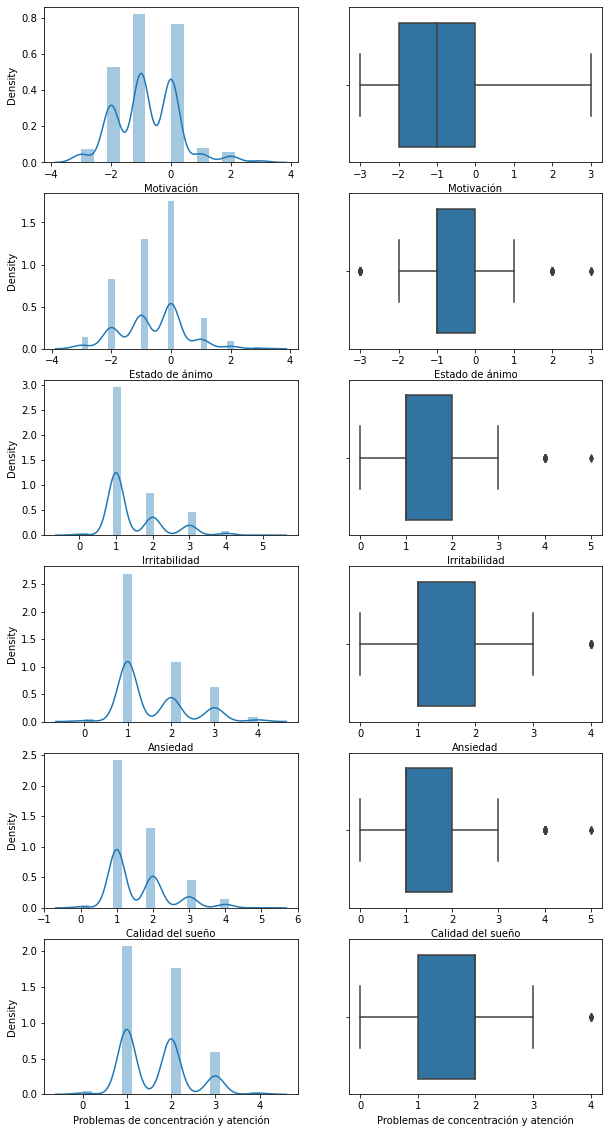

In [177]:
f, axes = plt.subplots(6, 2,figsize=(10,20))
sns_plot1 = sns.distplot(young['Motivación'],ax=axes[0,0])
sns_plot1=sns.boxplot(young['Motivación'],ax=axes[0,1])
sns_plot2 = sns.distplot(young['Estado de ánimo'],ax=axes[1,0])
sns_plot2=sns.boxplot(young['Estado de ánimo'],ax=axes[1,1])

sns_plot3 = sns.distplot(young['Irritabilidad'],ax=axes[2,0])
sns_plot3=sns.boxplot(young['Irritabilidad'],ax=axes[2,1])
sns_plot4 = sns.distplot(young['Ansiedad'],ax=axes[3,0])
sns_plot4=sns.boxplot(young['Ansiedad'],ax=axes[3,1])
sns_plot5 = sns.distplot(young['Calidad del sueño'],ax=axes[4,0])
sns_plot5=sns.boxplot(young['Calidad del sueño'],ax=axes[4,1])
sns_plot6 = sns.distplot(young['Problemas de concentración y atención'],ax=axes[5,0])
sns_plot6=sns.boxplot(young['Problemas de concentración y atención'],ax=axes[5,1])



## 3.2 Boxplots

<AxesSubplot:>

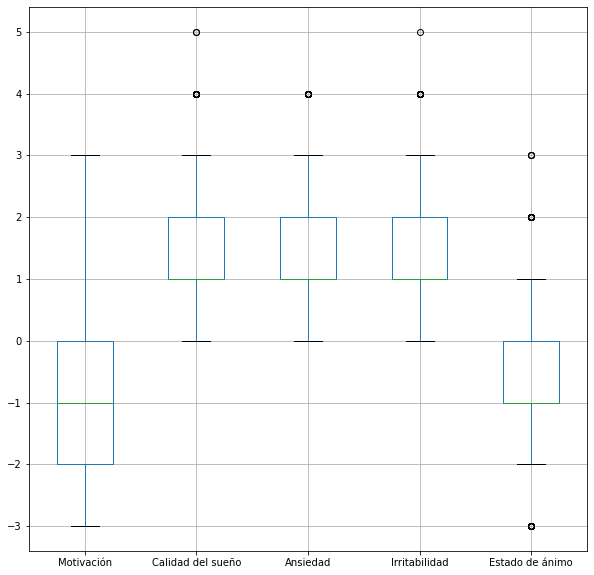

In [178]:
young.boxplot(column=["Motivación","Calidad del sueño","Ansiedad","Irritabilidad","Estado de ánimo"],figsize=(10, 10))

<AxesSubplot:>

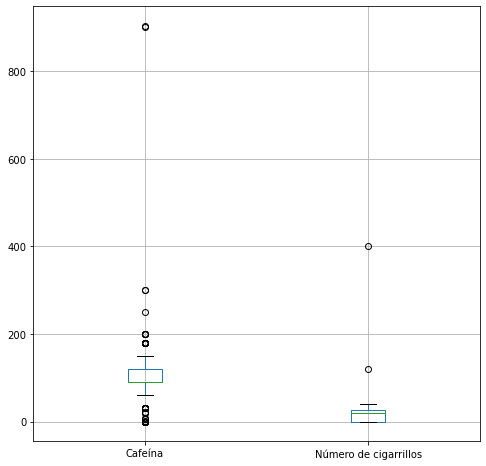

In [179]:
young.boxplot(column=["Cafeína","Número de cigarrillos"],figsize=(8, 8))

## 3.3 Gráfico de barras para comparar variable categórica

<AxesSubplot:title={'center':'Estado afectivo Bipolar %'}>

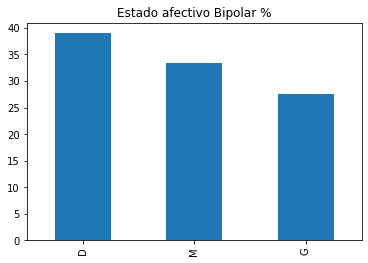

In [180]:
(100*young["Código"].value_counts()/len(young["Código"])).plot(kind='bar',title='Estado afectivo Bipolar %')

# Graficos en función del tiempo

In [181]:
dfDe=young[young["Código"]=="D"]


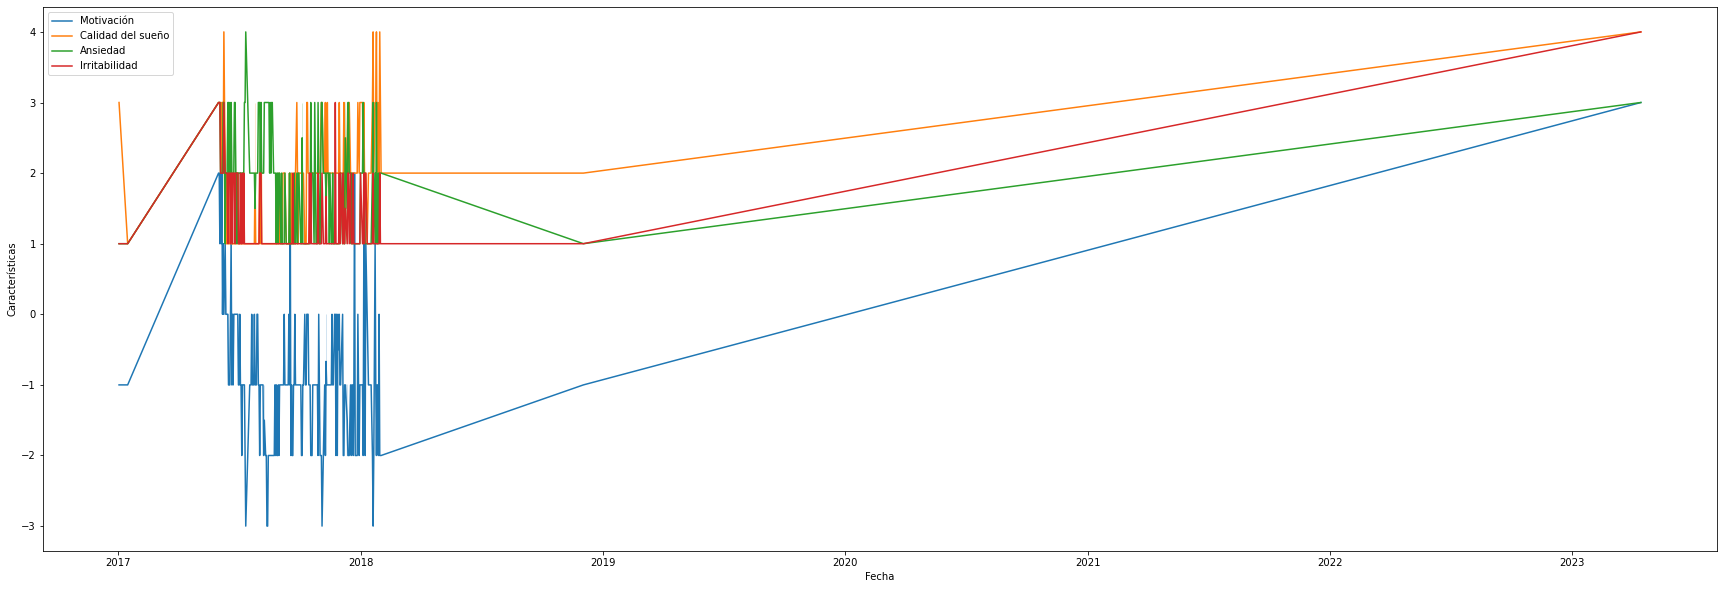

In [182]:
features=['Motivación','Calidad del sueño','Ansiedad','Irritabilidad']

#data=dfDE[young["Fecha"]].loc[2017:2019]
plt.figure(figsize=(30, 10))
for feature in features:
    sns.lineplot(x='fecha_datetime', y=feature,data=dfDe, label=feature)
    
plt.xlabel('Fecha')
plt.ylabel('Características')
#plt.title('Estado de Ánimo en Función del Tiempo')
#plt.xticks(rotation=45)
#plt.grid(True)
#plt.tight_layout()
plt.show()

In [183]:
dfMa=young[young["Código"]=="M"]

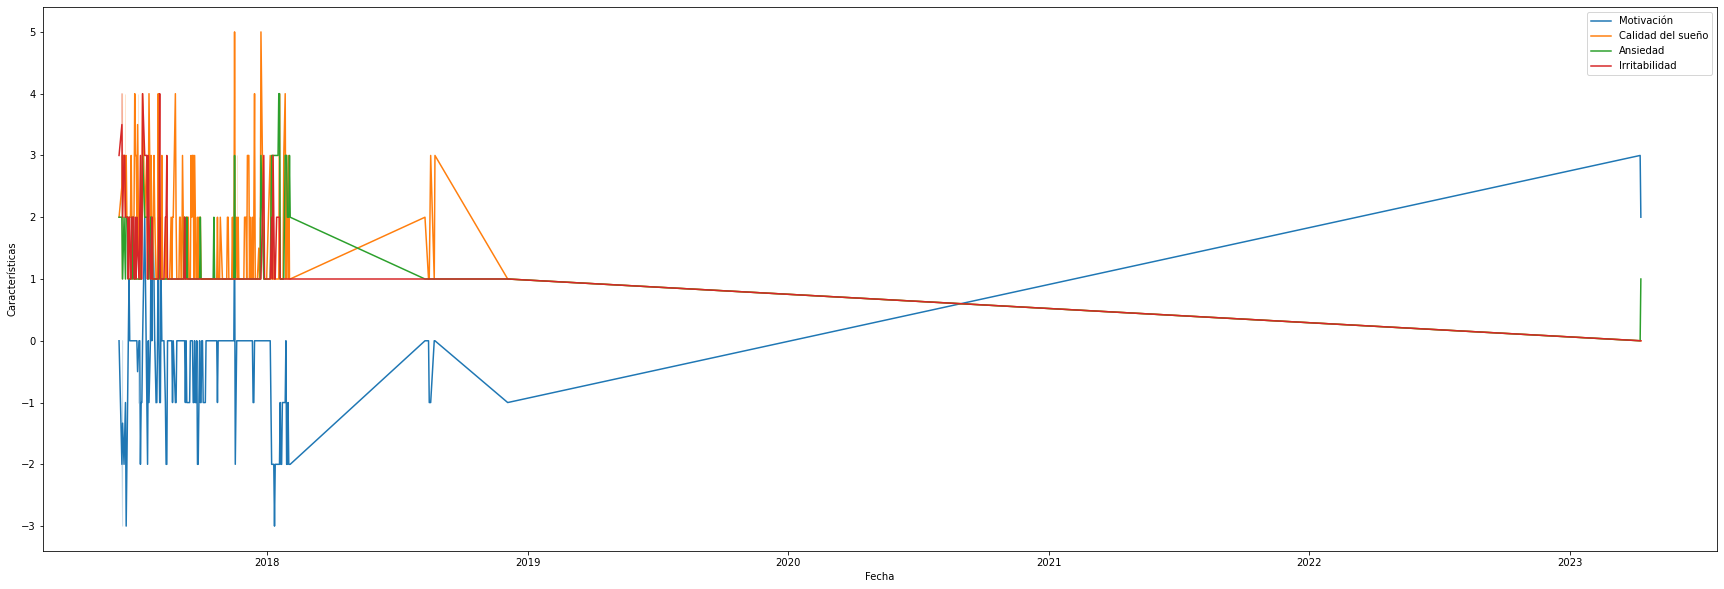

In [184]:
features=['Motivación','Calidad del sueño','Ansiedad','Irritabilidad']

#data=dfDE[young["Fecha"]].loc[2017:2019]
plt.figure(figsize=(30, 10))
for feature in features:
    sns.lineplot(x='fecha_datetime', y=feature,data=dfMa, label=feature)
    
plt.xlabel('Fecha')
plt.ylabel('Características')
#plt.title('Estado de Ánimo en Función del Tiempo')
#plt.xticks(rotation=45)
#plt.grid(True)
#plt.tight_layout()
plt.show()

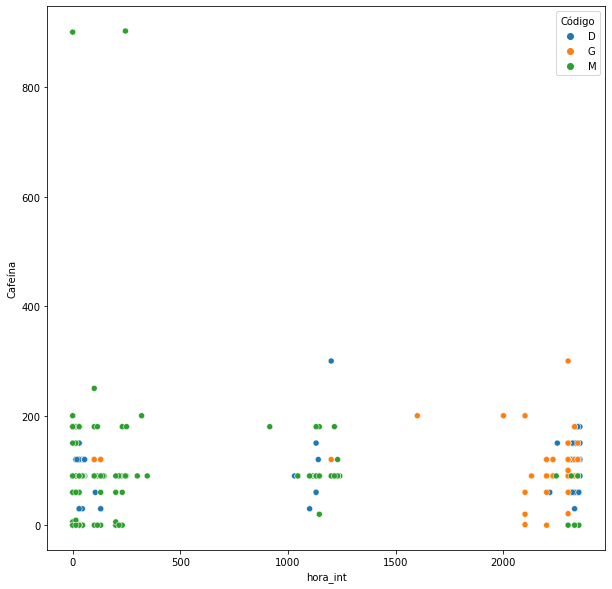

In [185]:
#young['Hora a la que te dormiste'] = pd.to_datetime(young['Hora a la que te dormiste'], format='%H:%M'

def convertir_hora_a_int(hora_str):
    horas, minutos = hora_str.split(':')
    hora_int = int(horas + minutos )
    return hora_int

young['hora_int'] = young['Hora a la que te dormiste'].apply(convertir_hora_a_int)

f, axes = plt.subplots(1, 1,figsize=(10,10))
a = sns.scatterplot(data=young,x='hora_int',y='Cafeína',hue="Código")


# 4. Análisis bivariado

<AxesSubplot:xlabel='Cafeína', ylabel='Calidad del sueño'>

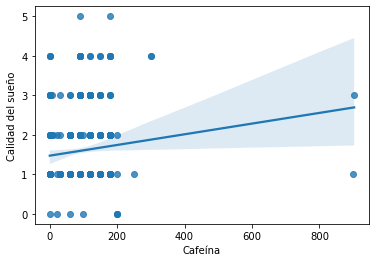

In [186]:
sns.regplot(data=young,x='Cafeína',y='Calidad del sueño')

<AxesSubplot:xlabel='Estado de ánimo', ylabel='Motivación'>

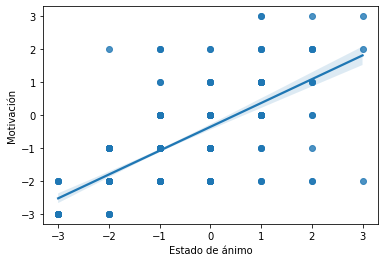

In [187]:
sns.regplot(data=young,x='Estado de ánimo',y='Motivación')

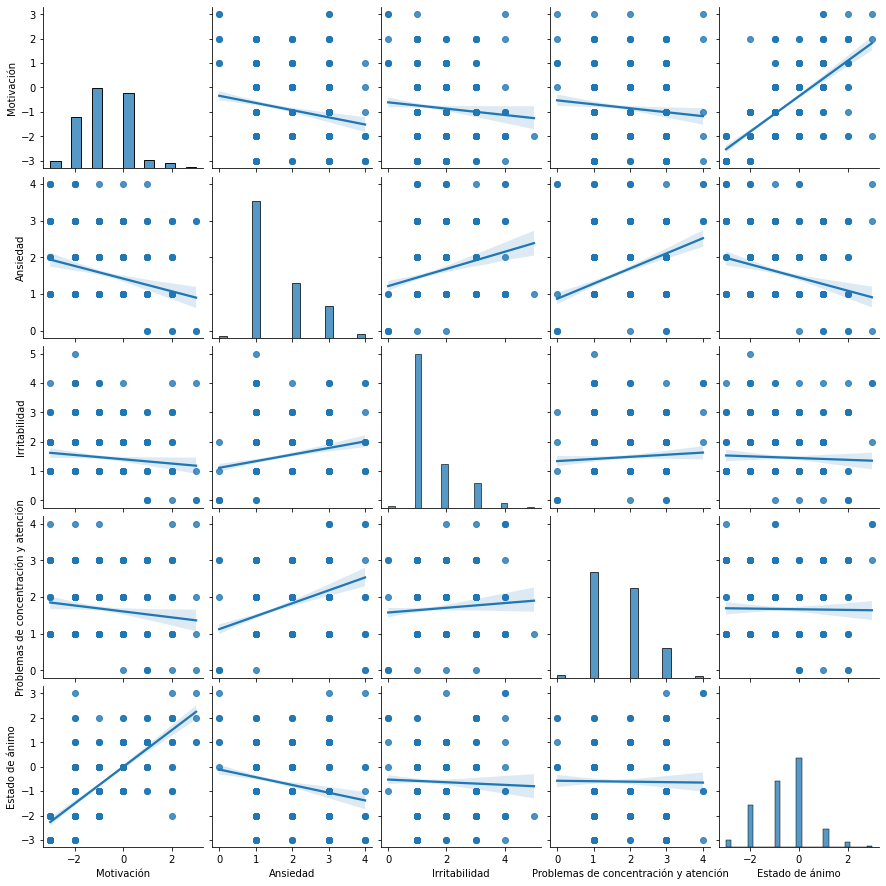

In [188]:
sns.pairplot(young,vars=['Motivación','Ansiedad','Irritabilidad','Problemas de concentración y atención','Estado de ánimo'],kind="reg")

<AxesSubplot:xlabel='Código', ylabel='Estado de ánimo'>

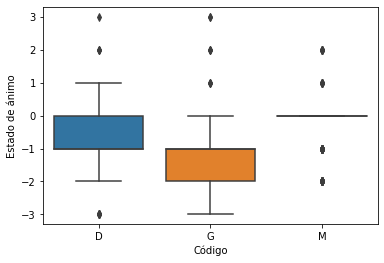

In [189]:
sns.boxplot(x='Código', y='Estado de ánimo', data=young)

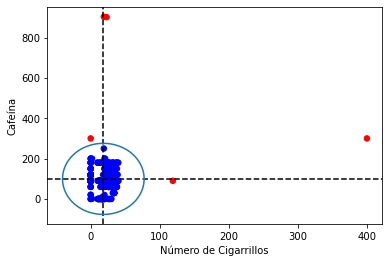

In [190]:
media = young['Número de cigarrillos'].mean()
std_x = young['Número de cigarrillos'].std()*3
media_y = young['Cafeína'].mean()
std_y = young['Cafeína'].std()*3

colors = ['blue']*len (young['Número de cigarrillos'])
for index, x in enumerate(young['Número de cigarrillos']):
    if abs(x-media) > std_x:
        colors[index] = 'red'
        
for index, x in enumerate(young['Cafeína']):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'

plt.scatter(young['Número de cigarrillos'],young['Cafeína'], s=30, color=colors)
plt.axhline(media_y, color='k', linestyle='--')
plt.axvline(media, color='k', linestyle='--')

v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis

t = np.linspace(0,2*pi,100)
plt.plot( v+b*np.cos(t) , u+a*np.sin(t) )

plt.xlabel('Número de Cigarrillos')
plt.ylabel('Cafeína')
plt.show()


<AxesSubplot:xlabel='Número de cigarrillos', ylabel='Cafeína'>

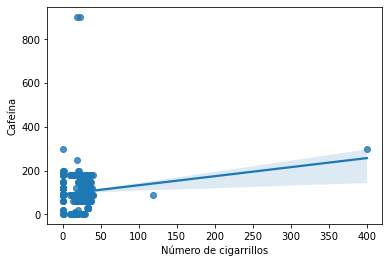

In [191]:

sns.regplot(data=young,x='Número de cigarrillos',y='Cafeína')


In [192]:
##sns.regplot(data=young_trimmed,x='Número de cigarrillos',y='Cafeína')

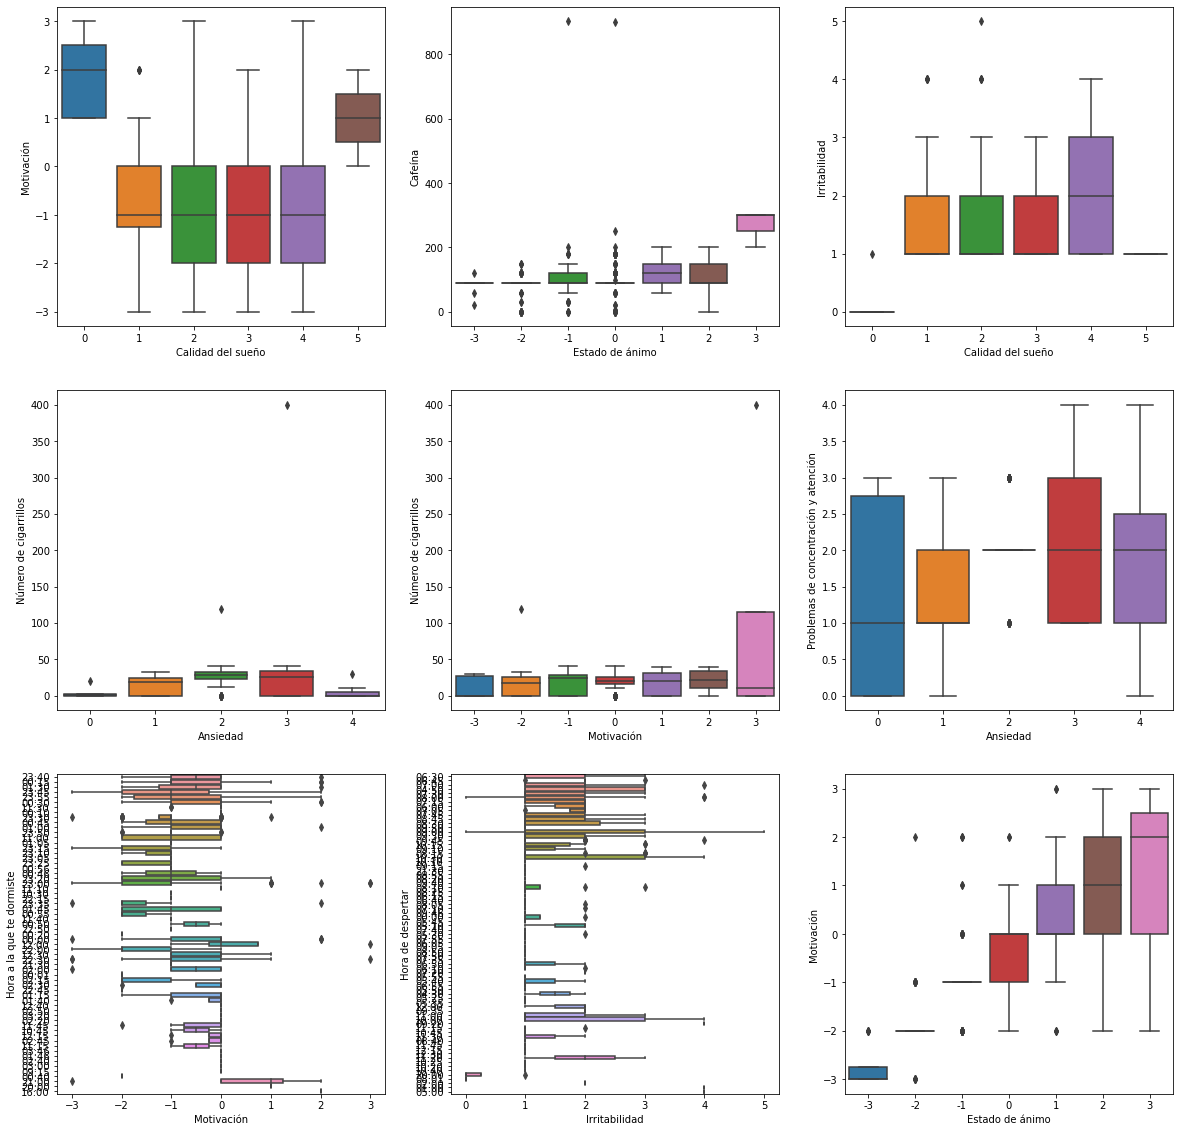

In [193]:
f, axes = plt.subplots(3, 3,figsize=(20,20))

a=sns.boxplot(data=young, x="Ansiedad", y="Número de cigarrillos",ax=axes[1,0])
b=sns.boxplot(data=young, x="Estado de ánimo", y="Cafeína",ax=axes[0,1])
c=sns.boxplot(data=young, x="Motivación", y="Número de cigarrillos",ax=axes[1,1])
d=sns.boxplot(data=young, x="Calidad del sueño", y="Motivación",ax=axes[0,0])
e=sns.boxplot(data=young, x="Motivación", y="Hora a la que te dormiste",ax=axes[2,0])
f=sns.boxplot(data=young, x="Irritabilidad", y="Hora de despertar",ax=axes[2,1])
g=sns.boxplot(data=young, x="Estado de ánimo", y="Motivación",ax=axes[2,2])
h=sns.boxplot(data=young, x="Calidad del sueño", y="Irritabilidad",ax=axes[0,2])
i=a=sns.boxplot(data=young, x="Ansiedad", y="Problemas de concentración y atención",ax=axes[1,2])


In [194]:
young1=young.drop(columns=["Código","Fecha","Hora de despertar","Hora a la que te dormiste"])

## 4.1 Detección de outliers 
El manejo de valores extremos (outliers) es una de las fases fundamentales en prácticamente cualquier proyecto de Ciencia de Datos.

Según el libro Applied Predictive Modeling (2013) los valores extremos “son muestras en nuestro set de datos que se encuentran excepcionalmente alejadas de la mayor parte de los datos.”


## 4.2 Detección de valores extremos usando visualización de los datos
Es la técnica más sencilla de todas aunque no siempre es la más efectiva. Consiste simplemente en generar una gráfica de nuestro set de datos y detectar posteriormente los outliers por simple inspección visual.

Observamos en la siguiente visualización notamos valores atípicos en cigarrillos y en cafeína.

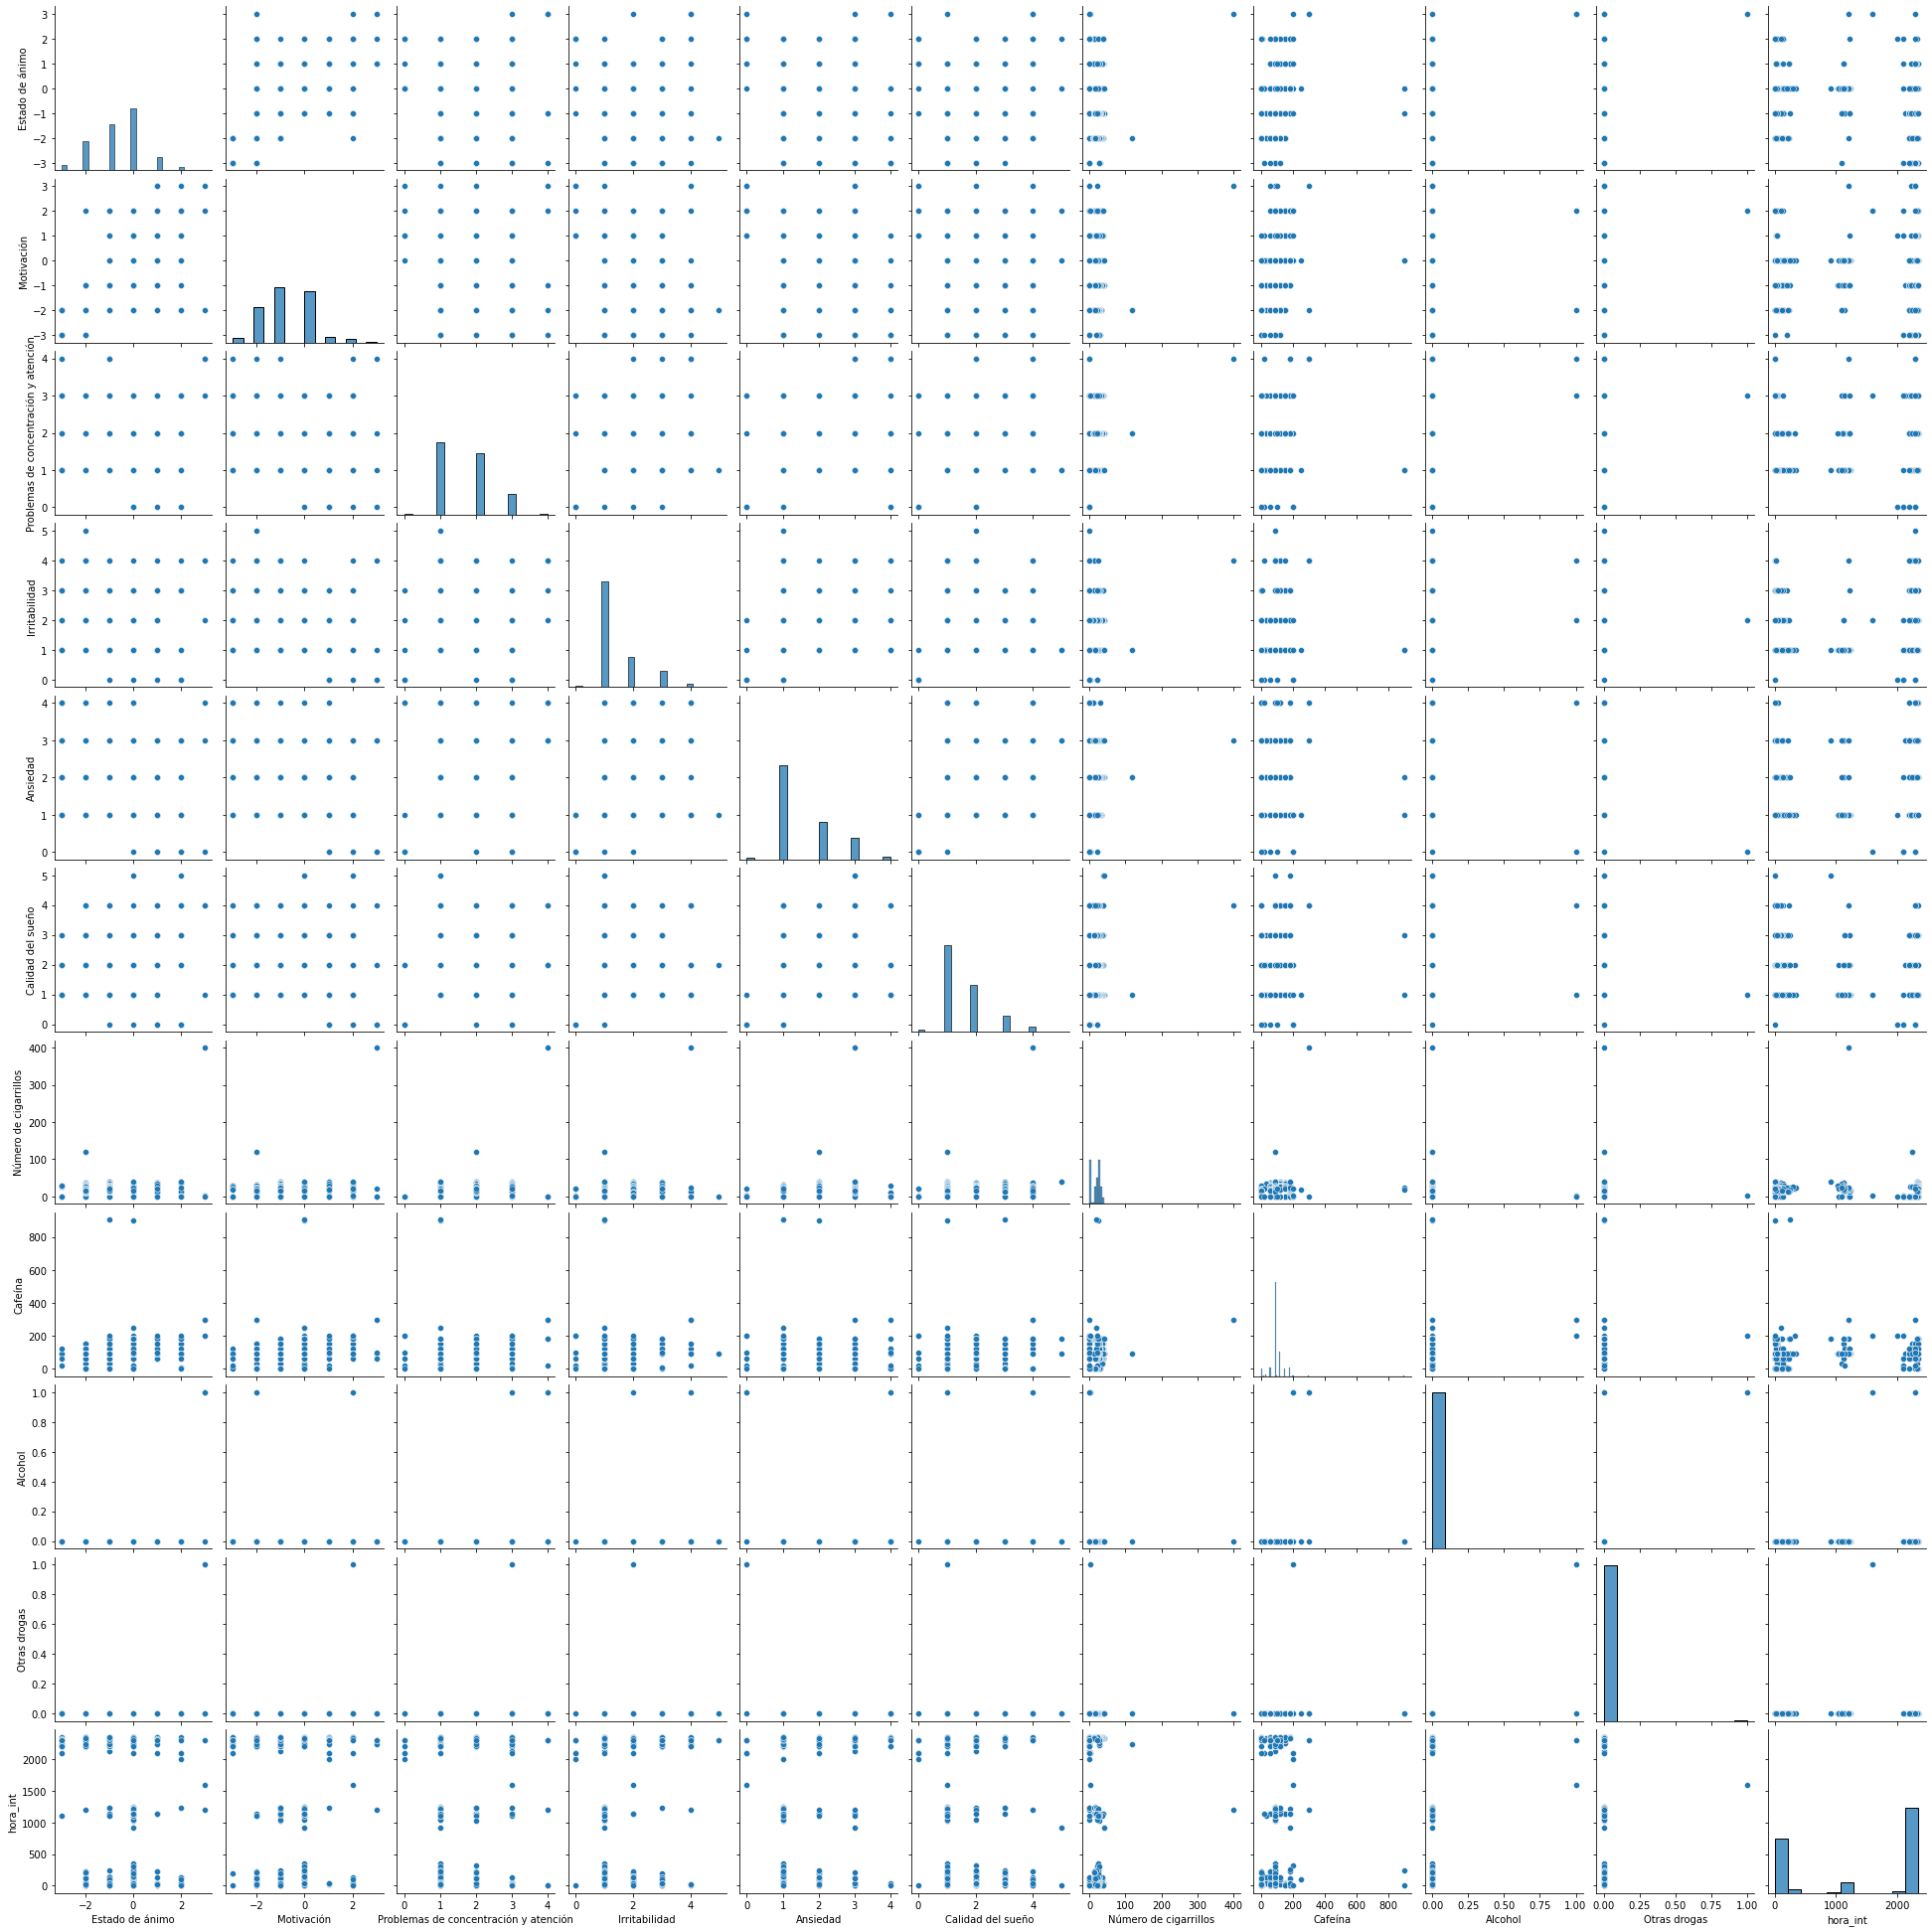

In [195]:
sns.pairplot(young1)

## 4.3 Método de eliminación (trimming)

Como su nombre lo indica, con este método simplemente se elimina el valor extremo de nuestro set de datos, dependiendo del criterio de detección usado.

Por ejemplo, podemos usar el criterio de la desviación estándar para eliminar valores extremos del set de datos correspondiente a la cafeína y cigarrillos:


In [196]:
#Calculamos limites de la distribucion de cafeina hasta 3 desviaciones estandar
mean_cafeina = young.mean()[7]
std_cafeina = young.std()[7]
lim_inf_caf = mean_cafeina - 3*std_cafeina
lim_sup_caf = mean_cafeina + 3*std_cafeina

#Calculamos limites de la distribución de cigarrillos hasta 3 desviaciones estandar
mean_cigarrillo=young.mean()[6]
std_cigarrillo=young.std()[6]
lim_inf_cig=mean_cigarrillo-3*std_cigarrillo
lim_sup_cig=mean_cigarrillo+3*std_cigarrillo

C:\Users\cris_\AppData\Local\Temp/ipykernel_11520/1416671863.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_cafeina = young.mean()[7]
C:\Users\cris_\AppData\Local\Temp/ipykernel_11520/1416671863.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_cafeina = young.mean()[7]
C:\Users\cris_\AppData\Local\Temp/ipykernel_11520/1416671863.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_cafeina = young.std()[7]
C:\Users\cris_\AppData\Local\Temp/ipykernel_11520/1416671863.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric

 Definimos el dataset young_trimmed eliminando los valores atípicos

In [197]:
# limito el dataset eliminando los valores atipicos
young_trimmed=young[(young["Cafeína"]>=lim_inf_caf)&(young["Cafeína"]<=lim_sup_caf)&(young["Número de cigarrillos"]>=lim_inf_cig)&(young["Número de cigarrillos"]<=lim_sup_cig)]



<AxesSubplot:>

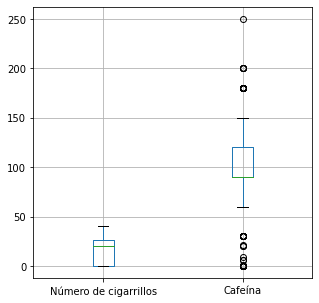

In [198]:
young_trimmed.boxplot(column=["Número de cigarrillos","Cafeína"],figsize=(5, 5))

## Metodo del rango intercuartiles

In [199]:
# Calcular los cuartiles 1 (25%), 2 (50%) y 3 (75%) para el set de datos de cafeina

q1 = young["Número de cigarrillos"].quantile(0.25)
q2 = young["Número de cigarrillos"].quantile(0.50)
q3 = young["Número de cigarrillos"].quantile(0.75)

iqr=q3-q1
iqr_lim_inf=q1-1.5*iqr
iqr_lim_sup=q3+1.5*iqr

# Y realizar el recorte
filter = (young["Número de cigarrillos"] >= iqr_lim_inf) & (young["Número de cigarrillos"] <= iqr_lim_sup)
young_capped=young[filter]


#young_capped=young[(young["Cafeína"]>=iqr_lim_inf)&(young["Cafeína"]<=iqr_lim_sup)]


<AxesSubplot:>

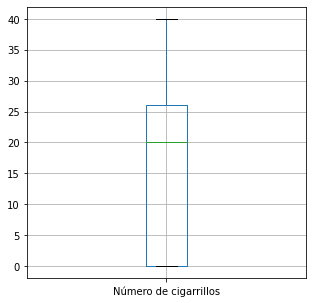

In [200]:
young_capped.boxplot(column=["Número de cigarrillos"],figsize=(5, 5))

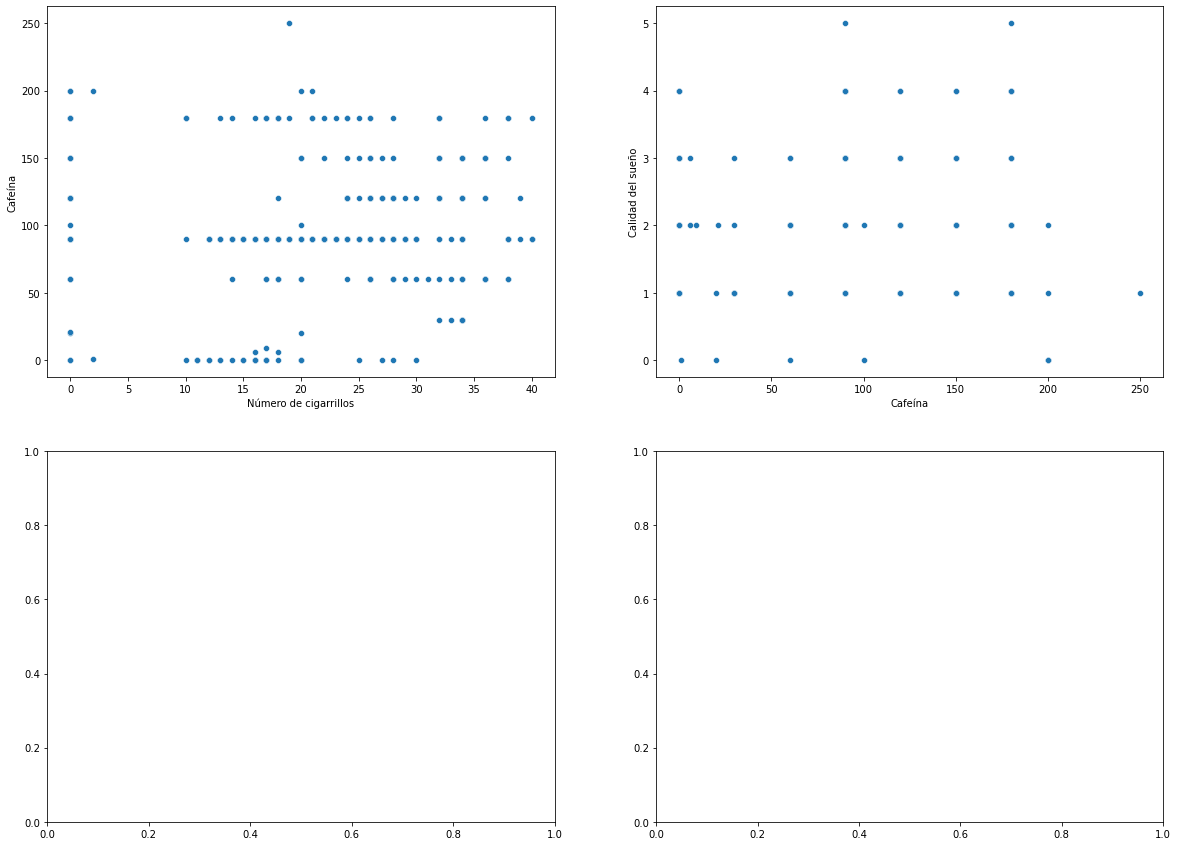

In [201]:

f, axes = plt.subplots(2, 2,figsize=(20,15))
a =sns.scatterplot(data=young_trimmed,x='Número de cigarrillos',y='Cafeína',ax=axes[0,0])
b= sns.scatterplot(data=young_trimmed,x='Cafeína',y='Calidad del sueño',ax=axes[0,1])

In [202]:
young_trimmed.shape

(656, 18)

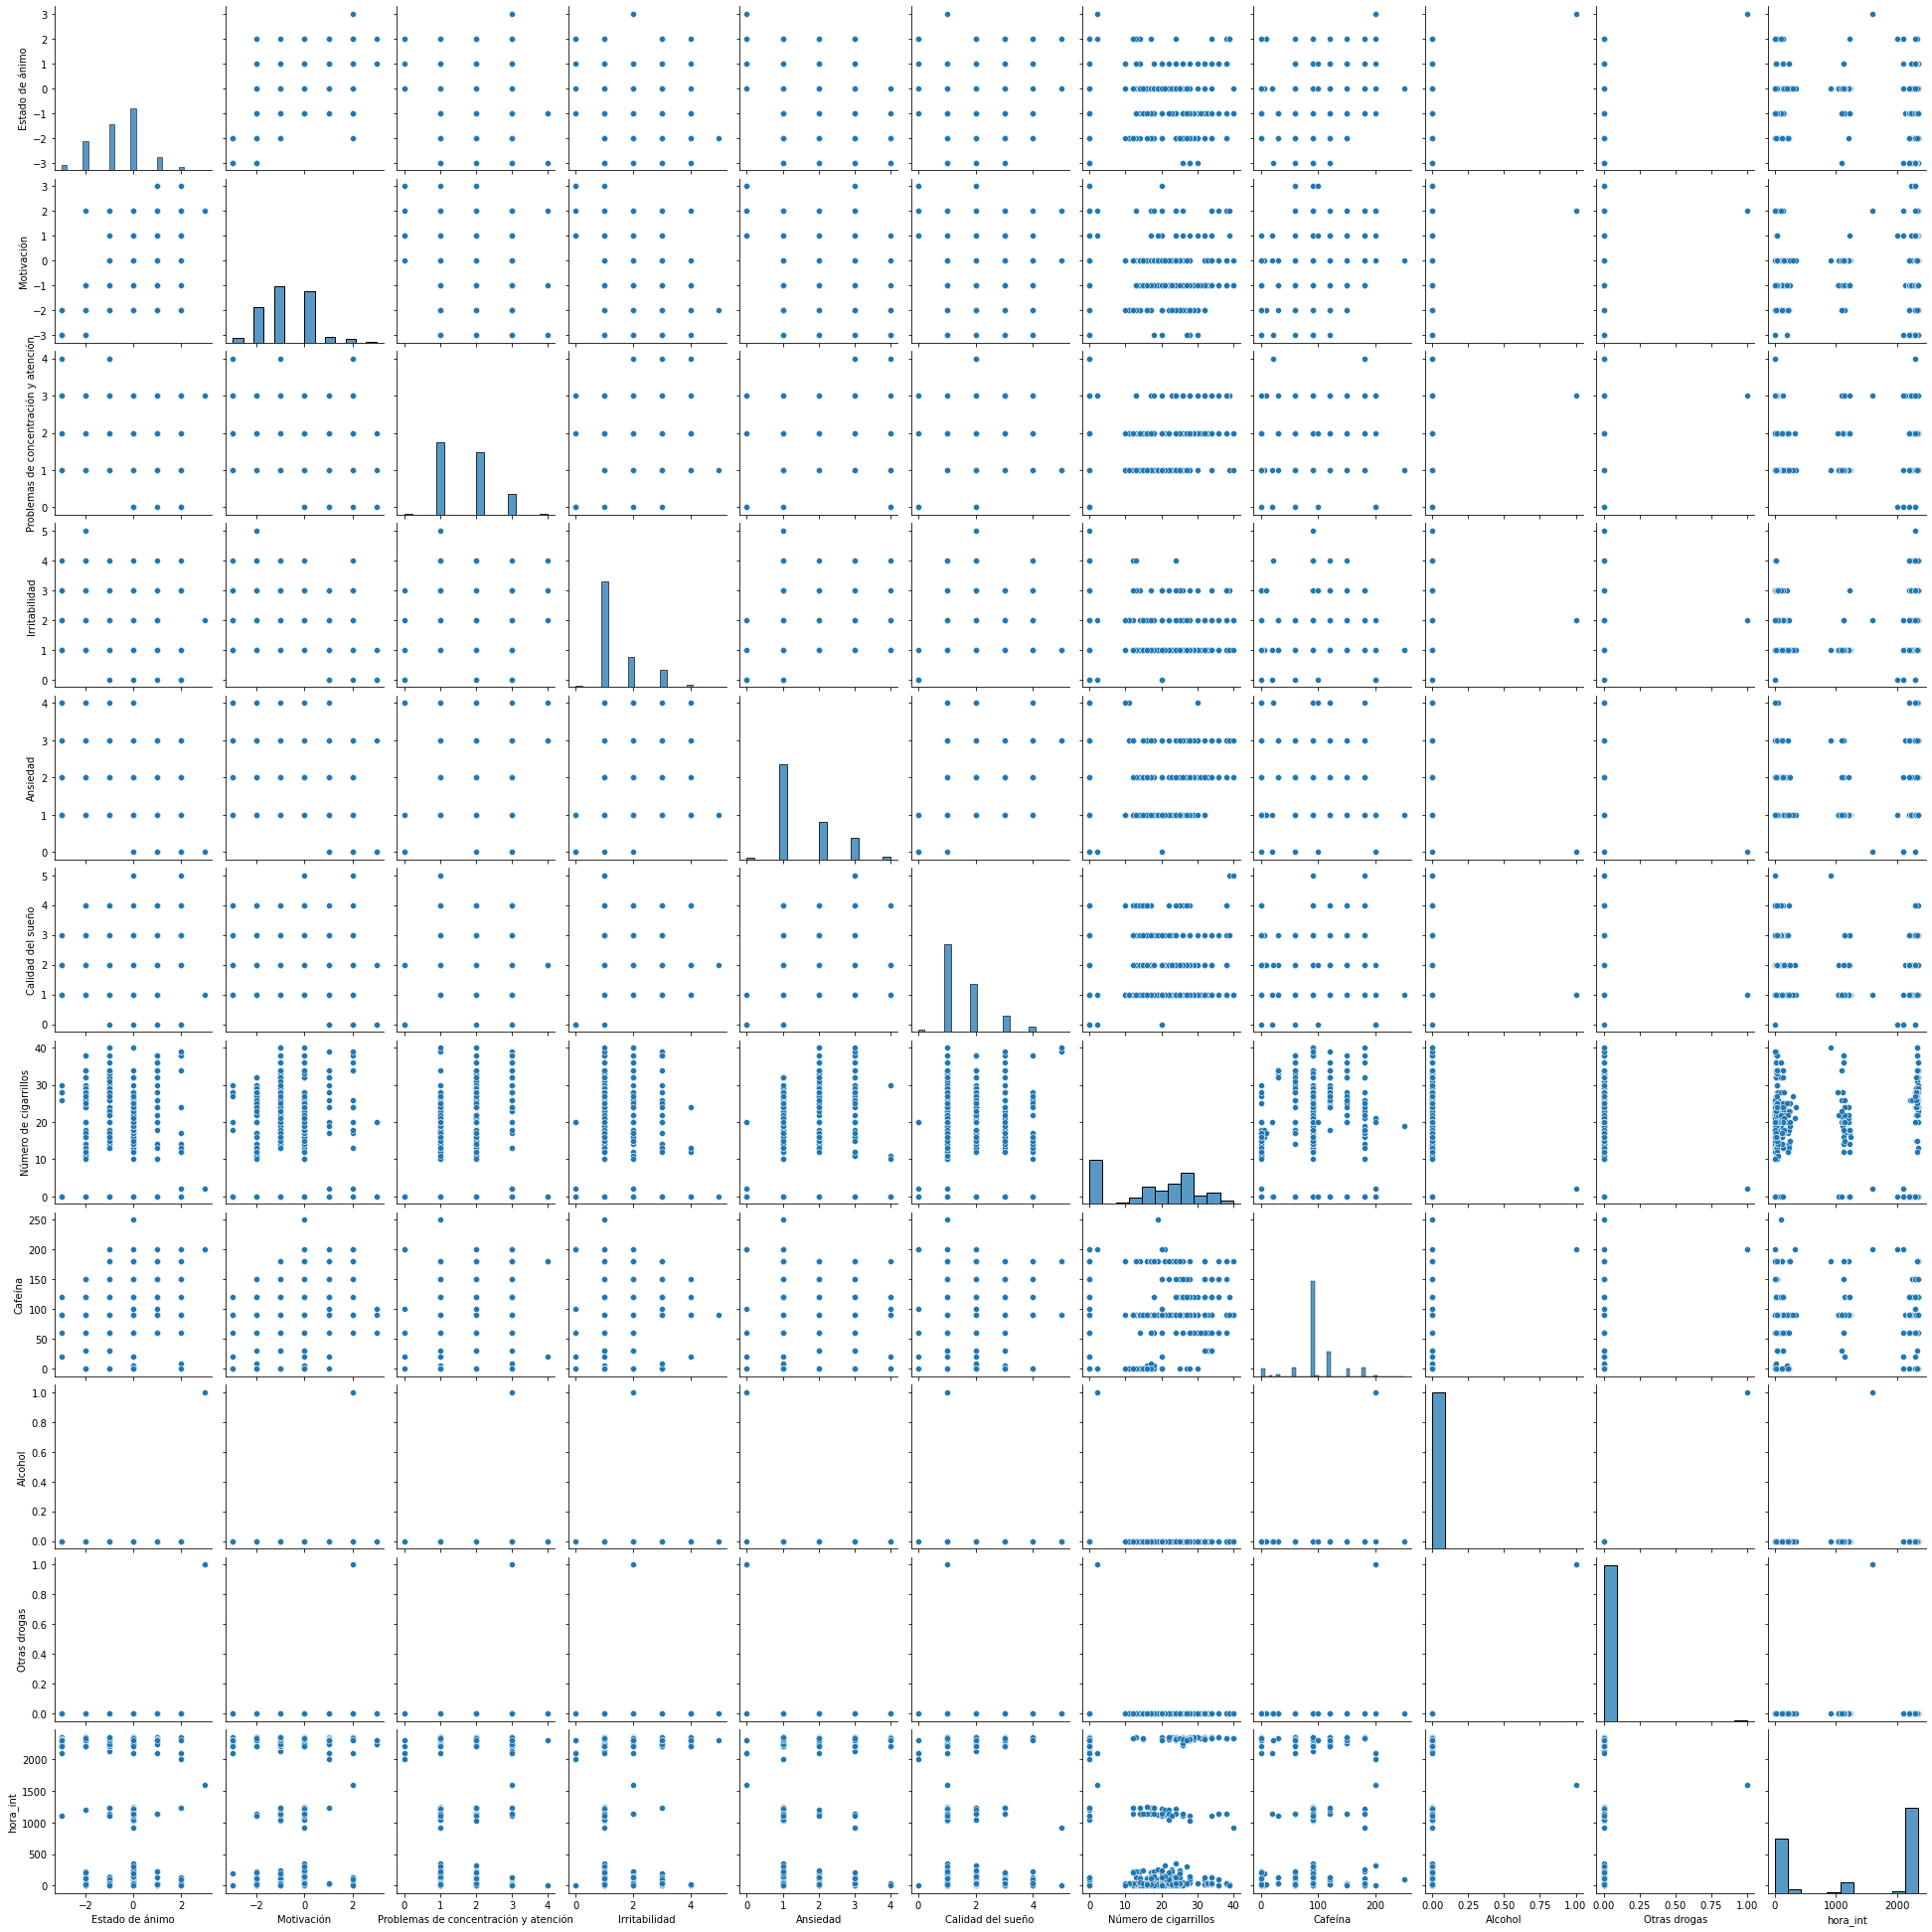

In [203]:
sns.pairplot(young_trimmed)

## 5. Análisis multivariable

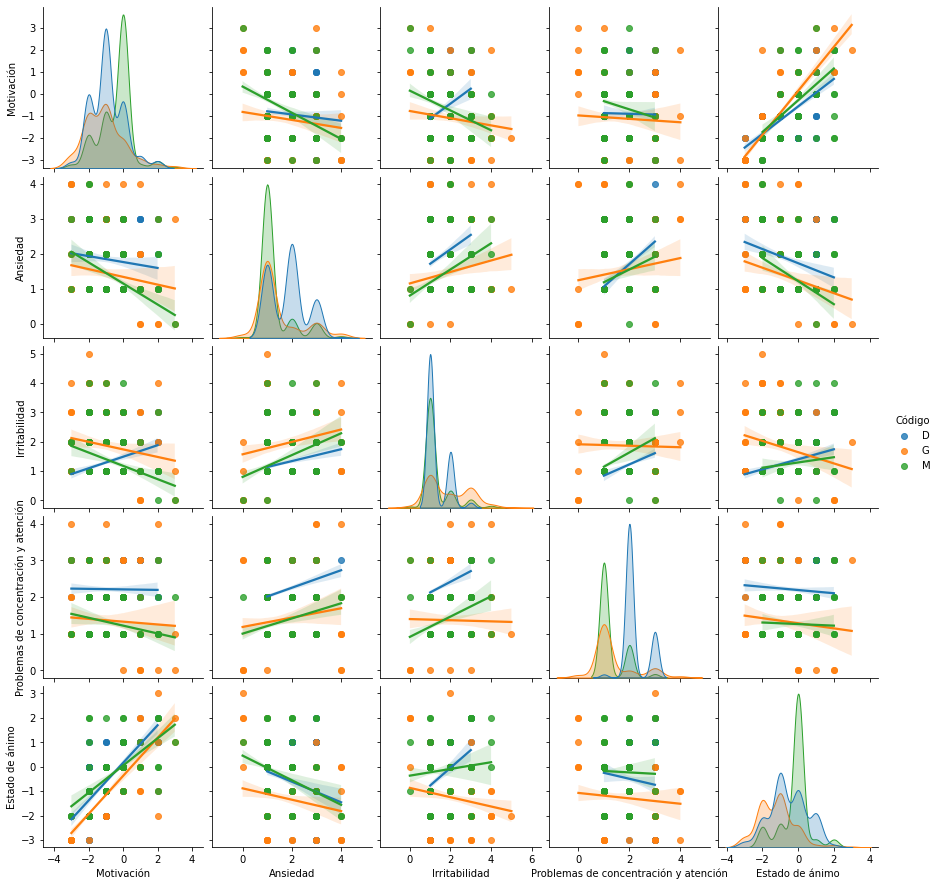

In [204]:
sns.pairplot(young_trimmed,vars=['Motivación','Ansiedad','Irritabilidad','Problemas de concentración y atención','Estado de ánimo'],kind="reg",hue="Código")

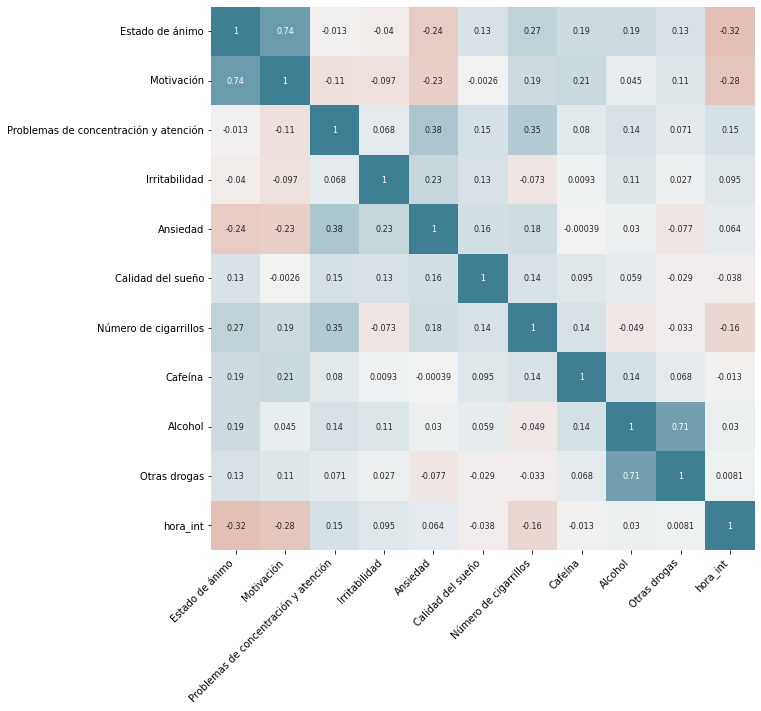

In [205]:
#Mapa de correlatividad con valores atipicos incluidos


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

b=sns.heatmap(
    young.corr(),
    annot= True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)






## 5.1 Análisis multivariable: Correlaciones con eliminación de outliers

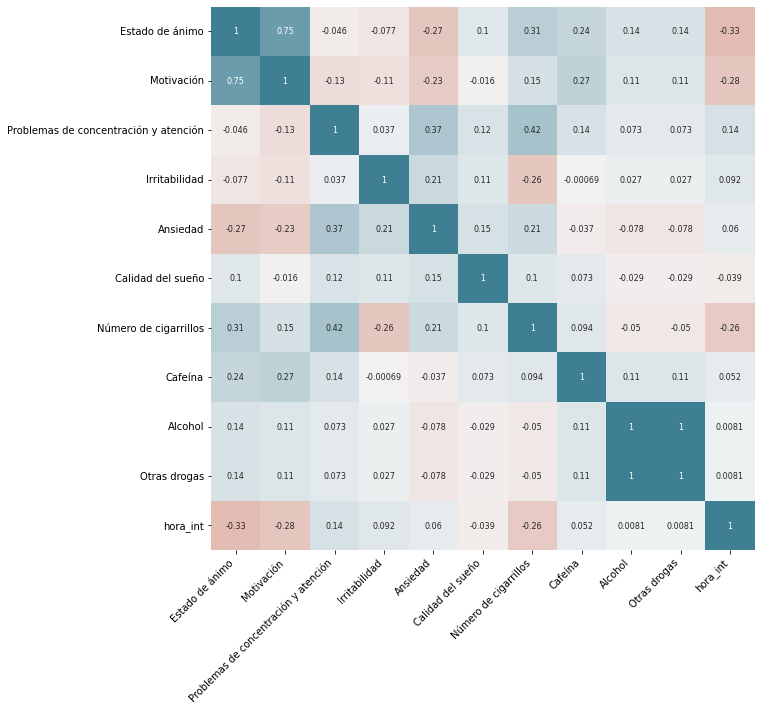

In [206]:
#Mapa de correlatividad utilizando el método de eliminación (trimming)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

b=sns.heatmap(
    young_trimmed.corr(),
    annot= True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## 6. Conclusiones:

* Dentro de la población de 559 pacientes con trastorno bipolar entrevistados, 257 poseen un estado depresivo, 218 un estado de  manía y 181 poseen un estado eutímico


* A simple vista en la carga del dataset notamos que la columna Ciclo Menstrual no tiene información por lo cual esa columna nos da un indicio de que la población relevada corresponde a entrevistados de género masculino. Como este dato no aporta información fue desestimado en el analisis exploratorio inicialmente.


* Notamos que a partir de la deteccion y posterior eliminación de datos outliers reducimos el dataset inicial de 661 a 656 filas de datos


* A partir de la eliminación de los valores atípicos notamos una variación en las correlaciones de datos 


* Podemos notar que en la visualización de Números de cigarrillo se separan 2 grupos: Consumo de tabaco que varian de 0 a 2 cigarrillos y consumo de tabaco a partir de 10 cigarrillos hasta los 40.


* Correlaciones:

        Fuertes:
            Alcohol-Drogas
            Motivación-Estado de ánimo
         
        Moderadas: 
            Problemas de Atencion-Cigarrillos
            Problemas de Atención-Ansiedad

        Debiles:
            Calidad de sueño- Irritabilidad

            Cigarrillos- Ansiedad
         
            Motivación-Cafeína
         
            Cafeína-Alcohol
         
            Cigarrillo-Animo




         
           

## 7. Analizamos las variables con respecto a cada clasificador de estado 

### Importamos el dataframe con los outliers eliminados 

In [207]:
young_trimmed

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha,fecha_datetime,Hora dormir,hora,hora_int
0,2,2,3,3,3,3,34,150,0.0,0.0,06:30,23:40,D,1/6/2017,2017-06-01,1900-01-01 23:40:00,23:40:00,2340
1,2,2,3,3,3,3,38,150,0.0,0.0,06:45,00:15,D,2/6/2017,2017-06-02,1900-01-01 00:15:00,00:15:00,15
2,2,1,3,3,3,3,39,120,0.0,0.0,07:00,00:15,D,3/6/2017,2017-06-03,1900-01-01 00:15:00,00:15:00,15
3,1,2,2,2,2,3,34,120,0.0,0.0,07:00,01:30,D,4/6/2017,2017-06-04,1900-01-01 01:30:00,01:30:00,130
4,1,1,3,2,2,2,32,150,0.0,0.0,07:00,23:45,D,5/6/2017,2017-06-05,1900-01-01 23:45:00,23:45:00,2345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,3,2,3,2,0,1,2,200,1.0,1.0,02:00,16:00,G,14/4/2023,2023-04-14,1900-01-01 16:00:00,16:00:00,1600
655,2,3,0,0,0,0,0,60,0.0,0.0,08:00,23:00,G,15/4/2023,2023-04-15,1900-01-01 23:00:00,23:00:00,2300
657,-3,-3,1,2,2,1,0,60,0.0,0.0,08:00,21:00,G,15/4/2023,2023-04-15,1900-01-01 21:00:00,21:00:00,2100
658,-3,-3,4,4,4,2,0,21,0.0,0.0,07:00,23:00,G,15/4/2023,2023-04-15,1900-01-01 23:00:00,23:00:00,2300


### 7.1. Agrupamos el dataset por categorías para evaluar cantidades de datos
Separamos el dataframe en tres filtrando por su Código de estado, luego contaremos cuantas filas hay de cada uno y evaluaremos esos datos para obtener medias, promedio y desviación estándar

In [208]:
young_trimmed.groupby(["Código"]).count()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Fecha,fecha_datetime,Hora dormir,hora,hora_int
Código,,,,,,,,,,,,,,,,,
D,257,257,257,257,257,257,257,257,257,257,257,257,257,257,257,257,257
G,181,181,181,181,181,181,181,181,177,177,181,181,180,180,181,181,181
M,218,218,218,218,218,218,218,218,216,216,218,218,217,217,218,218,218


In [209]:
dfD=young_trimmed["Código"]=="D"
dfM=young_trimmed["Código"]=="M"
dfG=young_trimmed["Código"]=="G"




In [210]:
young_trimmed[dfD].head()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha,fecha_datetime,Hora dormir,hora,hora_int
0,2,2,3,3,3,3,34,150,0.0,0.0,06:30,23:40,D,1/6/2017,2017-06-01,1900-01-01 23:40:00,23:40:00,2340
1,2,2,3,3,3,3,38,150,0.0,0.0,06:45,00:15,D,2/6/2017,2017-06-02,1900-01-01 00:15:00,00:15:00,15
2,2,1,3,3,3,3,39,120,0.0,0.0,07:00,00:15,D,3/6/2017,2017-06-03,1900-01-01 00:15:00,00:15:00,15
3,1,2,2,2,2,3,34,120,0.0,0.0,07:00,01:30,D,4/6/2017,2017-06-04,1900-01-01 01:30:00,01:30:00,130
4,1,1,3,2,2,2,32,150,0.0,0.0,07:00,23:45,D,5/6/2017,2017-06-05,1900-01-01 23:45:00,23:45:00,2345


In [211]:
young_trimmed[dfD].describe()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,hora_int
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.0,257.0,257.000000
mean,-0.548638,-0.914397,2.210117,1.307393,1.840467,1.688716,29.000000,102.957198,0.0,0.0,1735.844358
std,1.052605,0.948100,0.444821,0.510499,0.730098,0.752852,4.224186,30.410764,0.0,0.0,979.405519
min,-3.000000,-3.000000,1.000000,1.000000,1.000000,1.000000,22.000000,30.000000,0.0,0.0,10.000000
25%,-1.000000,-2.000000,2.000000,1.000000,1.000000,1.000000,26.000000,90.000000,0.0,0.0,1110.000000
50%,-1.000000,-1.000000,2.000000,1.000000,2.000000,2.000000,28.000000,90.000000,0.0,0.0,2330.000000
75%,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,32.000000,120.000000,0.0,0.0,2340.000000
max,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,40.000000,180.000000,0.0,0.0,2355.000000


In [212]:
young_trimmed[dfM].describe()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,hora_int
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,216.0,216.0,218.000000
mean,-0.192661,-0.431193,1.261468,1.275229,1.279817,1.669725,18.738532,88.536697,0.0,0.0,316.119266
std,0.802956,0.914471,0.489975,0.649304,0.650881,0.960559,4.922485,48.721261,0.0,0.0,546.630360
min,-2.000000,-3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,90.000000,0.0,0.0,15.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,19.000000,90.000000,0.0,0.0,45.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,21.750000,90.000000,0.0,0.0,227.500000
max,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,40.000000,250.000000,0.0,0.0,2350.000000


In [213]:
young_trimmed[dfG].describe()

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,hora_int
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,177.000000,177.000000,181.000000
mean,-1.226519,-1.088398,1.364641,1.878453,1.458564,1.392265,0.022099,96.751381,0.005650,0.005650,2171.574586
std,1.021199,1.156108,0.809436,1.025578,0.903509,0.727053,0.209651,26.250059,0.075165,0.075165,420.959395
min,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,90.000000,0.000000,0.000000,2200.000000
50%,-1.000000,-1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,90.000000,0.000000,0.000000,2300.000000
75%,-1.000000,-1.000000,1.000000,3.000000,2.000000,2.000000,0.000000,90.000000,0.000000,0.000000,2300.000000
max,3.000000,3.000000,4.000000,5.000000,4.000000,4.000000,2.000000,200.000000,1.000000,1.000000,2345.000000


## 7.1 Exploración especifica por código de estado

In [214]:
df=young_trimmed.groupby(["Código"])


df["Calidad del sueño"].value_counts()

Código  Calidad del sueño
D       1                    120
        2                    102
        3                     30
        4                      5
G       1                    118
        2                     43
        3                     12
        0                      5
        4                      3
M       1                    124
        2                     52
        3                     26
        4                     12
        0                      2
        5                      2
Name: Calidad del sueño, dtype: int64

In [215]:
df["Ansiedad"].value_counts()

Código  Ansiedad
D       2           117
        1            91
        3            48
        4             1
G       1           127
        3            25
        2            17
        4             7
        0             5
M       1           176
        2            22
        3            17
        4             2
        0             1
Name: Ansiedad, dtype: int64

In [216]:
df["Motivación"].value_counts()

Código  Motivación
D       -1            118
        -2             62
         0             56
         1             10
         2              6
        -3              5
G       -1             67
        -2             57
         0             29
        -3             13
         1              9
         2              4
         3              2
M        0            130
        -1             47
        -2             28
         2              6
        -3              3
         1              3
         3              1
Name: Motivación, dtype: int64

In [217]:
df["Alcohol"].value_counts()

Código  Alcohol
D       0.0        257
G       0.0        176
        1.0          1
M       0.0        216
Name: Alcohol, dtype: int64

In [218]:
df["Otras drogas"].value_counts()

Código  Otras drogas
D       0.0             257
G       0.0             176
        1.0               1
M       0.0             216
Name: Otras drogas, dtype: int64

In [219]:
df["Cafeína"].value_counts()

Código  Cafeína
D       90         110
        120         79
        150         27
        60          25
        30           9
        180          7
G       90         139
        120         23
        150          4
        180          4
        60           3
        200          3
        0            1
        1            1
        20           1
        21           1
        100          1
M       90         146
        0           28
        180         24
        60           8
        150          3
        6            2
        200          2
        9            1
        20           1
        100          1
        120          1
        250          1
Name: Cafeína, dtype: int64

In [220]:
df["Irritabilidad"].value_counts()

Código  Irritabilidad
D       1                184
        2                 67
        3                  6
G       1                 84
        3                 51
        2                 33
        4                  8
        0                  4
        5                  1
M       1                173
        2                 27
        3                 13
        4                  3
        0                  2
Name: Irritabilidad, dtype: int64

In [221]:
df["Problemas de concentración y atención"].value_counts()

Código  Problemas de concentración y atención
D       2                                        195
        3                                         58
        1                                          4
G       1                                        132
        3                                         23
        2                                         17
        0                                          6
        4                                          3
M       1                                        166
        2                                         47
        3                                          5
Name: Problemas de concentración y atención, dtype: int64

In [222]:
df["Ansiedad"].value_counts()

Código  Ansiedad
D       2           117
        1            91
        3            48
        4             1
G       1           127
        3            25
        2            17
        4             7
        0             5
M       1           176
        2            22
        3            17
        4             2
        0             1
Name: Ansiedad, dtype: int64

In [223]:
df["Estado de ánimo"].value_counts()

Código  Estado de ánimo
D       -1                  95
         0                  72
         1                  43
        -2                  37
        -3                   7
         2                   3
G       -1                  71
        -2                  62
         0                  28
        -3                  13
         1                   3
         2                   3
         3                   1
M        0                 157
        -1                  24
        -2                  21
         1                   8
         2                   8
Name: Estado de ánimo, dtype: int64

### 7.2 Visualización de variables filtradas por estado


### 7.3 Gráficos de Boxplot 
Observaremos la distribucion de los datos en cada estado para analizar relaciones entres sus cuartiles

### Visualización de variables de cada paciente/estado 

D         AxesSubplot(0.1,0.559091;0.363636x0.340909)
G    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
M             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

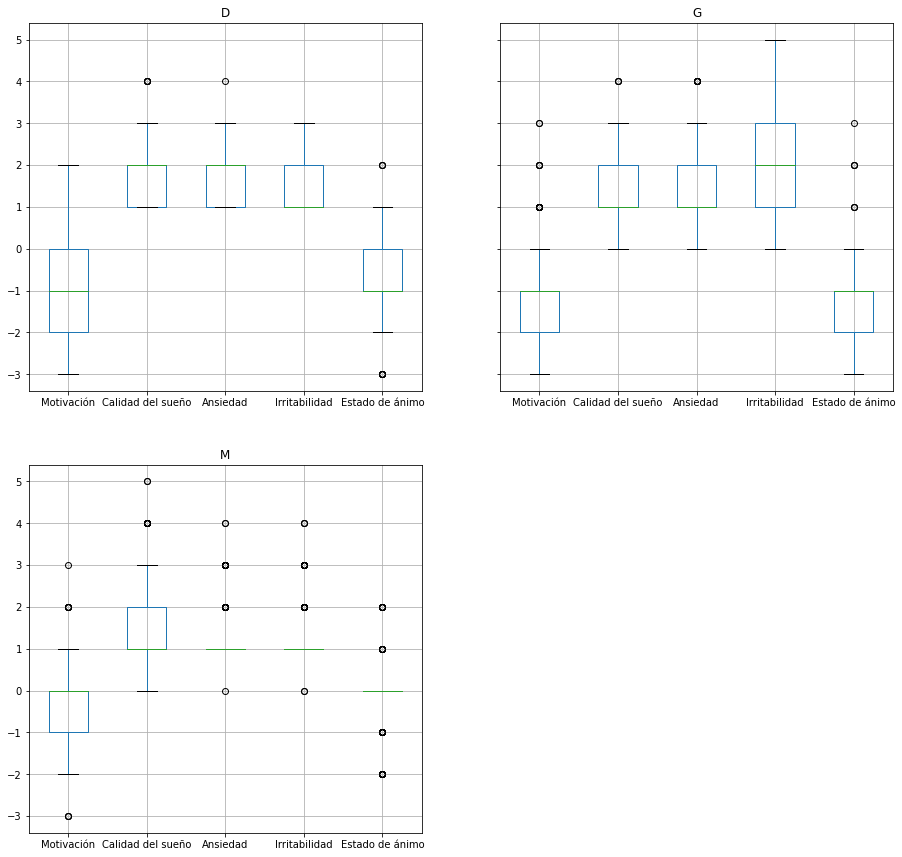

In [244]:
df.boxplot(column=["Motivación","Calidad del sueño","Ansiedad","Irritabilidad","Estado de ánimo"],figsize=(15, 15))

 Ahora vamos a analizar en general cada boxplot según su clasificación para ver como se diferencia la variable según su estado

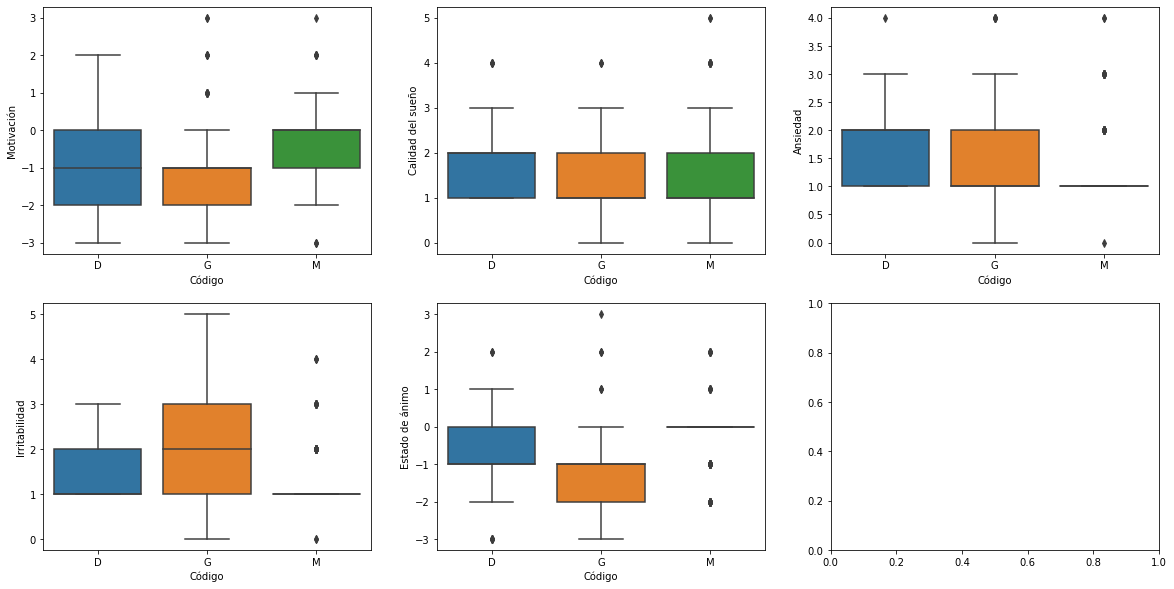

In [227]:
f, axes = plt.subplots(2, 3,figsize=(20,10))

a=sns.boxplot(data= young_trimmed, x="Código", y="Motivación",ax=axes[0,0])
b=sns.boxplot(data= young_trimmed, x="Código", y="Calidad del sueño",ax=axes[0,1])
c=sns.boxplot(data= young_trimmed, x="Código", y="Ansiedad",ax=axes[0,2])
d=sns.boxplot(data= young_trimmed, x="Código", y="Irritabilidad",ax=axes[1,0])
e=sns.boxplot(data= young_trimmed, x="Código", y="Estado de ánimo",ax=axes[1,1])



Notamos que en el estado de ánimo es donde podemos notar diferencias de valores según su clasificador

### 8. Correlaciones entre variables
A partir del analisis de correlaciones filtrados por su estado podemos observar cuanto insiden las variables en cada categoria.
Podemos observar que los valores de correlación varían con respecto al estado

### 8.1 Correlación entre variables de pacientes en estado Depresivo


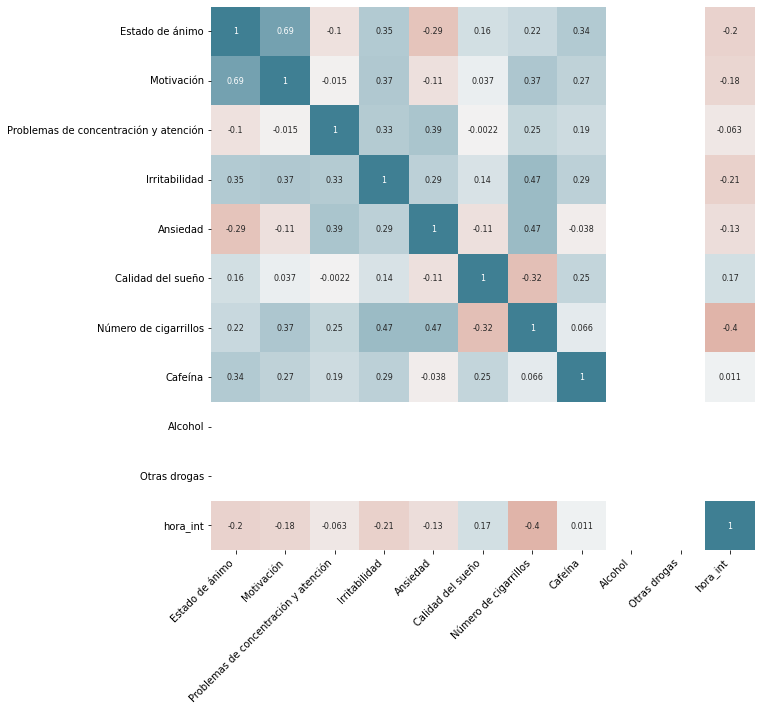

In [228]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

b=sns.heatmap(
    young_trimmed[dfD].corr(),
    annot= True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

### 8.2 Correlación entre variables de pacientes en estado de Manía

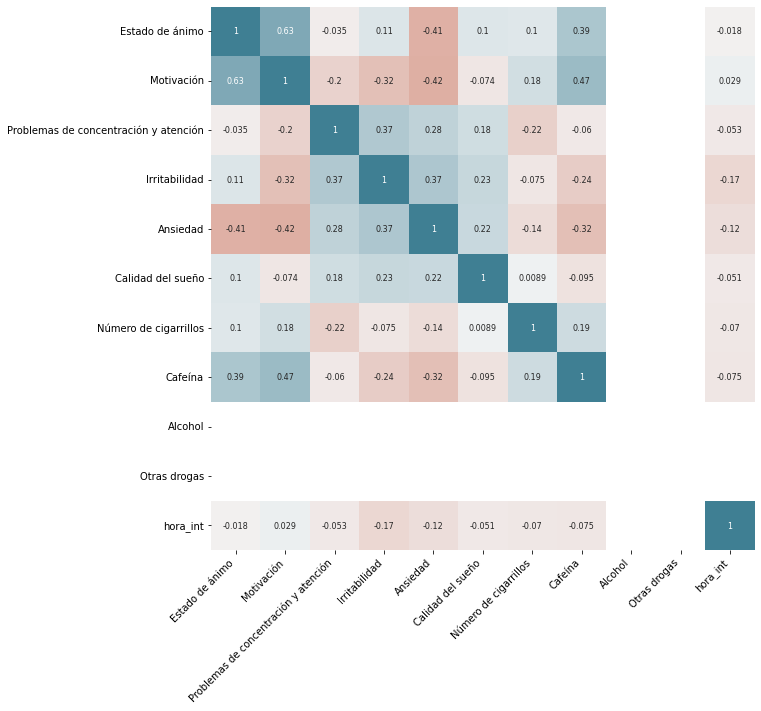

In [229]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

b=sns.heatmap(
    young_trimmed[dfM].corr(),
    annot= True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

### 8.3 Correlación entre variables de pacientes en estado Eutímico


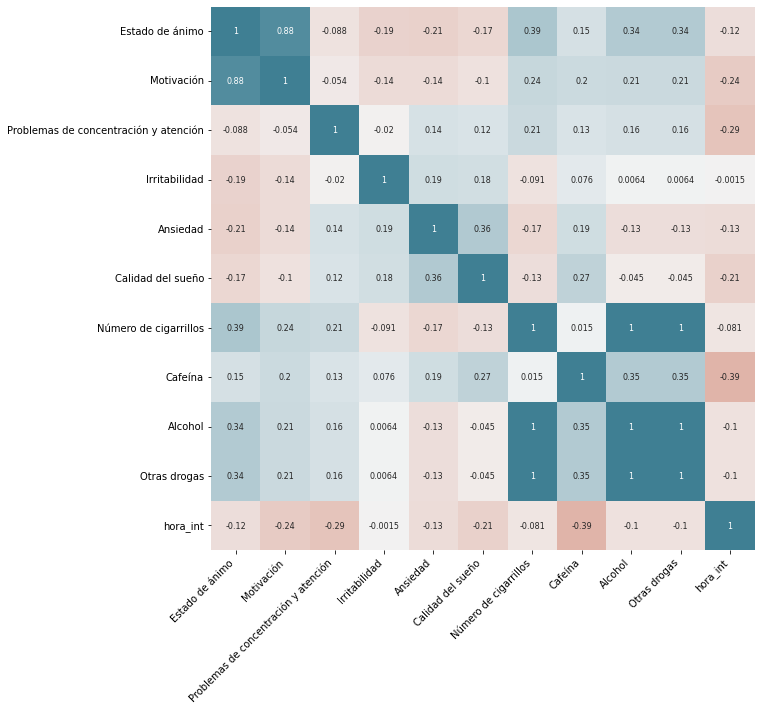

In [230]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

b=sns.heatmap(
    young_trimmed[dfG].corr(),
    annot= True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Observamos que en el estado eutímico, las correlacionesse hacen mas fuertes

In [231]:
dd=young_trimmed[dfD]

In [232]:
#features=["Estado de ánimo","Motivación","Irritabilidad","Número de cigarrillos","Cafeína"]
#x=dd[features]


In [233]:
#target=["Código"]
#y=dd[target]

In [234]:
#sns.scatterplot(x, y, data=young_trimmed[dfD], hue="Código")

<AxesSubplot:xlabel='Número de cigarrillos', ylabel='Alcohol'>

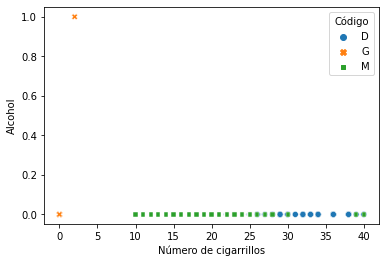

In [235]:
sns.scatterplot(x="Número de cigarrillos", y="Alcohol", data=young_trimmed, hue="Código",style="Código")

<AxesSubplot:xlabel='Ansiedad', ylabel='Motivación'>

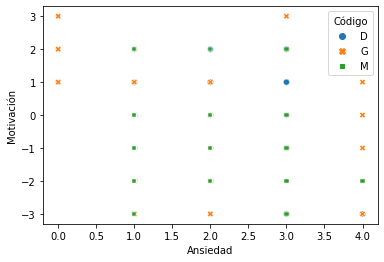

In [236]:
sns.scatterplot(x="Ansiedad", y="Motivación", data=young_trimmed, hue="Código",style="Código")

<AxesSubplot:xlabel='Número de cigarrillos', ylabel='Estado de ánimo'>

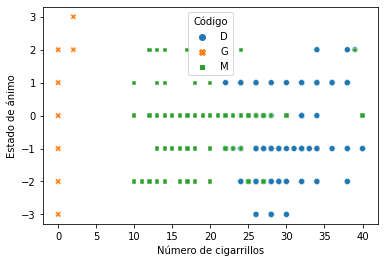

In [237]:
sns.scatterplot(x="Número de cigarrillos", y="Estado de ánimo", data=young_trimmed, hue="Código",style="Código")

Podemos observar en el gráfico que los pacientes en estado eutímico no superan en su mayoría los 5 cigarrillos, los  pacientes en estado de Mania van en rangos de 10 a 30 cigarrillos y los pacientes depresivos superan los 20 cigarrillos hasta los 40 por dia.

<AxesSubplot:xlabel='Cafeína', ylabel='Motivación'>

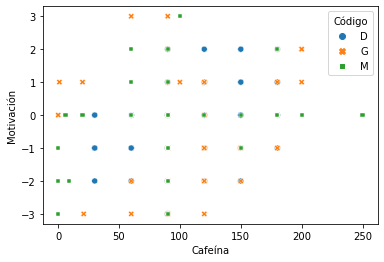

In [238]:
sns.scatterplot(x="Cafeína", y="Motivación", data=young_trimmed, hue="Código",style="Código")

<AxesSubplot:xlabel='Motivación', ylabel='Estado de ánimo'>

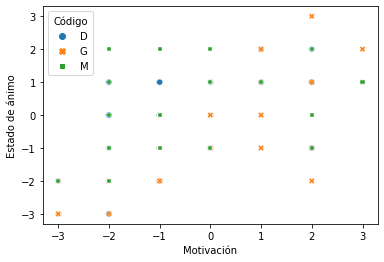

In [239]:
sns.scatterplot(x="Motivación", y="Estado de ánimo", data=young_trimmed, hue="Código",style="Código")

<AxesSubplot:xlabel='Ansiedad', ylabel='Calidad del sueño'>

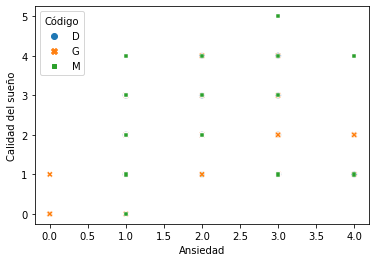

In [240]:
sns.scatterplot(x="Ansiedad", y="Calidad del sueño", data=young_trimmed, hue="Código",style="Código")

### 9. Comparación de medias de variables en distintos tipos de estado
Vamos a analizar donde se sitúa la media en las distintas variables filtrado por cada estado.

In [241]:
mediasD=young_trimmed[dfD].mean()
mediasM=young_trimmed[dfM].mean()
MediasG=young_trimmed[dfG].mean()

medias=pd.DataFrame()

medias['D']=young_trimmed[dfD].mean()
medias['M']=young_trimmed[dfM].mean()
medias['G']=young_trimmed[dfG].mean()
print(medias)


                                                 D           M            G
Estado de ánimo                          -0.548638   -0.192661    -1.226519
Motivación                               -0.914397   -0.431193    -1.088398
Problemas de concentración y atención     2.210117    1.261468     1.364641
Irritabilidad                             1.307393    1.275229     1.878453
Ansiedad                                  1.840467    1.279817     1.458564
Calidad del sueño                         1.688716    1.669725     1.392265
Número de cigarrillos                    29.000000   18.738532     0.022099
Cafeína                                 102.957198   88.536697    96.751381
Alcohol                                   0.000000    0.000000     0.005650
Otras drogas                              0.000000    0.000000     0.005650
hora_int                               1735.844358  316.119266  2171.574586


C:\Users\cris_\AppData\Local\Temp/ipykernel_11520/4110188270.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mediasD=young_trimmed[dfD].mean()
C:\Users\cris_\AppData\Local\Temp/ipykernel_11520/4110188270.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediasD=young_trimmed[dfD].mean()
C:\Users\cris_\AppData\Local\Temp/ipykernel_11520/4110188270.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mediasM=young_trimmed[dfM].mean()
C:\Users\cris_\AppData\Local\Temp/ipykernel_11520/4110188270.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future 

Podemos observar que las medias de las diferentes variables se encuentran en valores similares en los distintos estados sin embargo podemos observar variables como los cigarrillos donde se observan diferencias marcadas en cada estado

# Tips para hacer un mejor análisis exploratorio de datos

1. Primero hay que darse cuenta que tenemos **datos numéricos, categóricos y binarios.**

2. Luego de haber hecho una vista gorda de los datos (por ejemplo de los value_counts(), y head()) habría que sacar las **medias, medianas, el desvío estándar, etc.** de todas las variables numéricas que tenemos.

3. Luego de calcular esos atributos, pasamos a la visualización de datos. Noté que en la visualización estás constantemente tratando de buscar correlaciones. Esto no es malo pero tampoco es nuestro único objetivo. Las correlaciones no llegan tan fácilmente, primero hay que profundizar con todos los campos y luego tratar de buscar las correlaciones. **Estas visualizaciones son con una sola variable, acá no comparamos nada**. Te tiro un par de ejemplos de visualizaciones que podes hacer

* **Histogramas
* **Boxplots
* **Gráfico de barras para comparar variables categóricas

4. Luego de una extensa cantidad de visualizaciones de todos los campos, hay que hacer un **análisis bivariado**. Esto es lo que venias haciendo vos con los scatter plots. Pero también te recomiendo comparar con boxplots y gráficos de barras

5. Luego del bivariado viene el **análisis multivariado**, que es lo que hiciste muy bien buscando las correlaciones.

6. Por último vienen las **conclusiones** de esta etapa

7. Cuando termines este proceso, vamos a arrancar a hacer combinaciones con los datos. Por ejemplo, juntar a los de mottivación 2 y compararlos con los que tienen ansiedad 3. Haciendo este tipo de combinaciones encontramos la mayor cantidad de correlaciones.

# Tips para hacer un mejor notebook

DOCUMENTÁ ! No veo que estes escribiendo palabras acá. El notebook tomalo como un lugar para hacer anotaciones y aclaraciones, no solo un lugar donde copias y pegas código. Quiero que describas todos los pasos que haces. Necesito que escribas, y mucho. Esto te ayudará para cuando tengas que escribir el informe.

Por ejemplo, describí lo que hiciste en la eliminación de outliers. Cuando agarré el notebook no sabía donde estaba.